In [389]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection


In [390]:
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
import oapackage
%config InlineBackend.figure_format = 'retina'

In [391]:
def make_error_boxes(ax, xdata, ydata, xerror, yerror, colors, alpha=0.5):

    # Create list for all the error patches
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for x, y, xe, ye, color in zip(xdata, ydata, xerror.T, yerror.T, colors):
        rect = Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum(), color=color,alpha=alpha)
        errorboxes.append(rect)
        ax.add_patch(rect)
        
    for x, y, xe, ye, color in zip(xdata, ydata, xerror.T, yerror.T, colors):
        ax.errorbar(x, y, xerr=xe[0], yerr=ye[0],marker='o', markersize=8,linestyle='none',capsize = 5, color=color)

In [392]:
# Import data from .csv file
prostate_df = pd.read_csv("prostate.csv",sep=";")
#prostate_df

In [393]:
# Import data from .csv file
breast_df = pd.read_csv("breast.csv",sep=";")
#breast_df

In [394]:
prostate_cases=[3790,3648,3782,3482,3840]
prostate_case_detailed=3790
breast_cases=[3832,3749,3477,3833,3929,4136,4155,4203,4357,4390,4428,4494,4531,4585,4681]
breast_case_detailed=3832

cases = np.array([[3482,'P-IV'],[3648,'P-II'],[3782,'P-III'],[3790,'P-I'],[3840,'P-V'],
                  [3477,'B-III'],[3749,'B-II'],[3832,'B-I'],[3833,'B-IV'],[3929,'B-V'],
                  [4136,'B-IV'],[4155,'B-VII'],[4203,'B-VIII'],[4357,'B-IX'],[4390,'B-X'],
                  [4428,'B-XI'],[4494,'B-XII'],[4531,'B-XIII'],[4585,'B-XIV'],[4681,'B-XV']])
def get_case(var):
    for case in cases:
        if (var == case[0].astype(int)):
            return case[1]
        
markers = np.array([[3482,'o'],[3648,'^'],[3782,'s'],[3790,'D'],[3840,'v'],
                    [3477,'o'],[3749,'^'],[3832,'s'],[3833,'D'],[3929,'v'],
                    [4136,'<'],[4155,'>'],[4203,'X'],[4357,'P'],[4390,'H'],
                    [4428,'+'],[4494,'x'],[4531,'1'],[4585,'2'],[4681,'d']])
def get_marker(var):
    for marker in markers:
        if (var == marker[0].astype(int)):
            return marker[1]

#labels = np.array([['none','Nominal'],['PTV','PTV'],['COWC','Minimax'],['INTERVAL3','Interval3']])
labels = np.array([['none','Nominal'],['PTV','PTV'],['COWC','Minimax'],['C-COWC','C-Minimax']])
#labels = np.array([['none','Nominal'],['PTV','PTV'],['COWC','Minimax'],['STOCH','Stochastic'],['C-COWC','C-Minimax'],['INTERVAL3','Interval3']])
def get_label(var):
    for label in labels:
        if (var == label[0]):
            return label[1]
        
#colors = np.array([['none','black'],['PTV','red'],['COWC','blue'],['INTERVAL3','#FF9900']])
colors = np.array([['none','black'],['PTV','red'],['COWC','blue'],['C-COWC','#5DC863FF']])
#colors = np.array([['none','black'],['PTV','red'],['COWC','blue'],['STOCH','gold'],['C-COWC','#5DC863FF'],['INTERVAL3','#FF9900']])
def get_color(var):
    for color in colors:
        if (var == color[0]):
            return color[1]

In [395]:
mode=1

In [396]:
prostate_cminimax_indexes=[]
w1=5 # 1% - 0.01
w2=1 # 1%
w3=1 # 1%

for CaseID in prostate_cases:
    df=prostate_df[(prostate_df['CaseID']==CaseID)]
    items=['RI CTV','V40 Rectum','V60 Bladder','p1','p2','Objectives']
    data_ref=np.asarray(df[(df['Robustness']=='PTV')].filter(items=items))
    data=np.asarray(df[(df['Robustness']=='C-COWC')].filter(items=items))
    #print(data)
    #print("mode: ",mode)
    if(mode==0):
        index=np.argmax((100*w1*data[:,0]-w2*data[:,1]-w3*data[:,2])*(data[:,1]<=40)*(data[:,2]<=35))
    if(mode==1):
        index=np.argmax(1/pow(data[:,1]-data_ref[0,1],2)*(data[:,0]>=data_ref[0,0]))
    if(mode==2):
        index=np.argmax(1/pow(data[:,2]-data_ref[0,2],2)*(data[:,0]>=data_ref[0,0]))
    prostate_cminimax_indexes.append([CaseID,index])
    print('CaseID ', CaseID,'(',get_case(CaseID),')')
    print('--------------------')
    print('Reference data (PTV)')
    print('RI =',data_ref[0][0])
    print('V40 Rectum =',data_ref[0][1],'%')
    print('V60 Bladder =',data_ref[0][2],'%')
    print('--------------------')
    print('c-minimax data')
    print('p1 =',data[index][3])
    print('p2 =',data[index][4])
    print('RI =',data[index][0])
    print('V40 Rectum =',data[index][1],'%')
    print('V60 Bladder =',data[index][2],'%')
    print('\n')

def get_prostate_cminimax_index(var):
    for index in prostate_cminimax_indexes:
        if (var == index[0]):
            return index[1]

        

CaseID  3790 ( P-I )
--------------------
Reference data (PTV)
RI = 0.4639
V40 Rectum = 13.66 %
V60 Bladder = 15.59 %
--------------------
c-minimax data
p1 = 1.0
p2 = 11.0
RI = 0.5099
V40 Rectum = 18.41 %
V60 Bladder = 14.83 %


CaseID  3648 ( P-II )
--------------------
Reference data (PTV)
RI = 0.6593
V40 Rectum = 19.43 %
V60 Bladder = 15.6 %
--------------------
c-minimax data
p1 = 1.0
p2 = 12.0
RI = 0.6604
V40 Rectum = 29.29 %
V60 Bladder = 13.36 %


CaseID  3782 ( P-III )
--------------------
Reference data (PTV)
RI = 0.6301
V40 Rectum = 16.85 %
V60 Bladder = 17.57 %
--------------------
c-minimax data
p1 = 1.0
p2 = 13.0
RI = 0.6954
V40 Rectum = 22.55 %
V60 Bladder = 14.65 %


CaseID  3482 ( P-IV )
--------------------
Reference data (PTV)
RI = 0.7002
V40 Rectum = 24.32 %
V60 Bladder = 30.57 %
--------------------
c-minimax data
p1 = 1.0
p2 = 7.0
RI = 0.7073
V40 Rectum = 27.17 %
V60 Bladder = 29.79 %


CaseID  3840 ( P-V )
--------------------
Reference data (PTV)
RI = 0.7589
V40

In [397]:
prostate_cminimax_indexes[0]=[3790, 11]
prostate_cminimax_indexes[2]=[3782, 11]
prostate_cminimax_indexes[3]=[3482, 10]
prostate_cminimax_indexes[4]=[3840, 7]

In [398]:
print(prostate_cminimax_indexes)

[[3790, 11], [3648, np.int64(11)], [3782, 11], [3482, 10], [3840, 7]]


In [399]:
prostate_interval_indexes=[]
w1=1 # 1% - 0.01
w2=1 # 1%
w3=1 # 1%

for CaseID in prostate_cases:
    df=prostate_df[(prostate_df['CaseID']==CaseID)]
    items=['RI CTV','V40 Rectum','V60 Bladder','theta1','theta2','Objectives']
    data_ref=np.asarray(df[(df['Robustness']=='PTV')].filter(items=items))
    data=np.asarray(df[(df['Robustness']=='INTERVAL3')].filter(items=items))
    #print(data)
    #print("mode: ",mode)
    if(mode==0):
        index=np.argmax((100*w1*data[:,0]-w2*data[:,1]-w3*data[:,2])*(data[:,1]<=40)*(data[:,2]<=35))
    if(mode==1):
        index=np.argmax(1/pow(data[:,1]-data_ref[0,1],2)*(data[:,0]>=data_ref[0,0]))
    if(mode==2):
        index=np.argmax(1/pow(data[:,2]-data_ref[0,2],2)*(data[:,0]>=data_ref[0,0]))
    prostate_interval_indexes.append([CaseID,index])
    print('CaseID ', CaseID,'(',get_case(CaseID),')')
    print('--------------------')
    print('Reference data (PTV)')
    print('RI =',data_ref[0][0])
    print('V40 Rectum =',data_ref[0][1],'%')
    print('V60 Bladder =',data_ref[0][2],'%')
    print('--------------------')
    print('Interval3 data')
    print('theta1 =',data[index][3])
    print('theta2 =',data[index][4])
    print('RI =',data[index][0])
    print('V40 Rectum =',data[index][1],'%')
    print('V60 Bladder =',data[index][2],'%')
    print('\n')

def get_prostate_interval_index(var):
    for index in prostate_interval_indexes:
        if (var == index[0]):
            return index[1]


CaseID  3790 ( P-I )
--------------------
Reference data (PTV)
RI = 0.4639
V40 Rectum = 13.66 %
V60 Bladder = 15.59 %
--------------------
Interval3 data
theta1 = 1.0
theta2 = 0.0
RI = 0.5361
V40 Rectum = 13.66 %
V60 Bladder = 12.09 %


CaseID  3648 ( P-II )
--------------------
Reference data (PTV)
RI = 0.6593
V40 Rectum = 19.43 %
V60 Bladder = 15.6 %
--------------------
Interval3 data
theta1 = 1.0
theta2 = 0.1
RI = 0.6636
V40 Rectum = 19.41 %
V60 Bladder = 11.9 %


CaseID  3782 ( P-III )
--------------------
Reference data (PTV)
RI = 0.6301
V40 Rectum = 16.85 %
V60 Bladder = 17.57 %
--------------------
Interval3 data
theta1 = 0.6
theta2 = 0.1
RI = 0.6822
V40 Rectum = 16.93 %
V60 Bladder = 13.54 %


CaseID  3482 ( P-IV )
--------------------
Reference data (PTV)
RI = 0.7002
V40 Rectum = 24.32 %
V60 Bladder = 30.57 %
--------------------
Interval3 data
theta1 = 10.0
theta2 = 0.0
RI = 0.766
V40 Rectum = 24.74 %
V60 Bladder = 28.09 %


CaseID  3840 ( P-V )
--------------------
Referenc

/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/1310358302.py:16: RuntimeWarning: divide by zero encountered in divide
  index=np.argmax(1/pow(data[:,1]-data_ref[0,1],2)*(data[:,0]>=data_ref[0,0]))


In [400]:
print(prostate_interval_indexes)

[[3790, np.int64(16)], [3648, np.int64(16)], [3782, np.int64(7)], [3482, np.int64(23)], [3840, np.int64(13)]]


<>:7: SyntaxWarning: invalid escape sequence '\,'
<>:63: SyntaxWarning: invalid escape sequence '\,'
<>:82: SyntaxWarning: invalid escape sequence '\%'
<>:98: SyntaxWarning: invalid escape sequence '\,'
<>:157: SyntaxWarning: invalid escape sequence '\,'
<>:177: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\,'
<>:63: SyntaxWarning: invalid escape sequence '\,'
<>:82: SyntaxWarning: invalid escape sequence '\%'
<>:98: SyntaxWarning: invalid escape sequence '\,'
<>:157: SyntaxWarning: invalid escape sequence '\,'
<>:177: SyntaxWarning: invalid escape sequence '\%'
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/2273729902.py:7: SyntaxWarning: invalid escape sequence '\,'
  ax2.set_ylabel('V$_{40  \, Gy}$ Rectum [%]', fontsize=16,labelpad=15)
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/2273729902.py:63: SyntaxWarning: invalid escape sequence '\,'
  ax2.annotate('V$_{40 \, Gy}$ = 40%', (0.6, 40),
/var/folders/

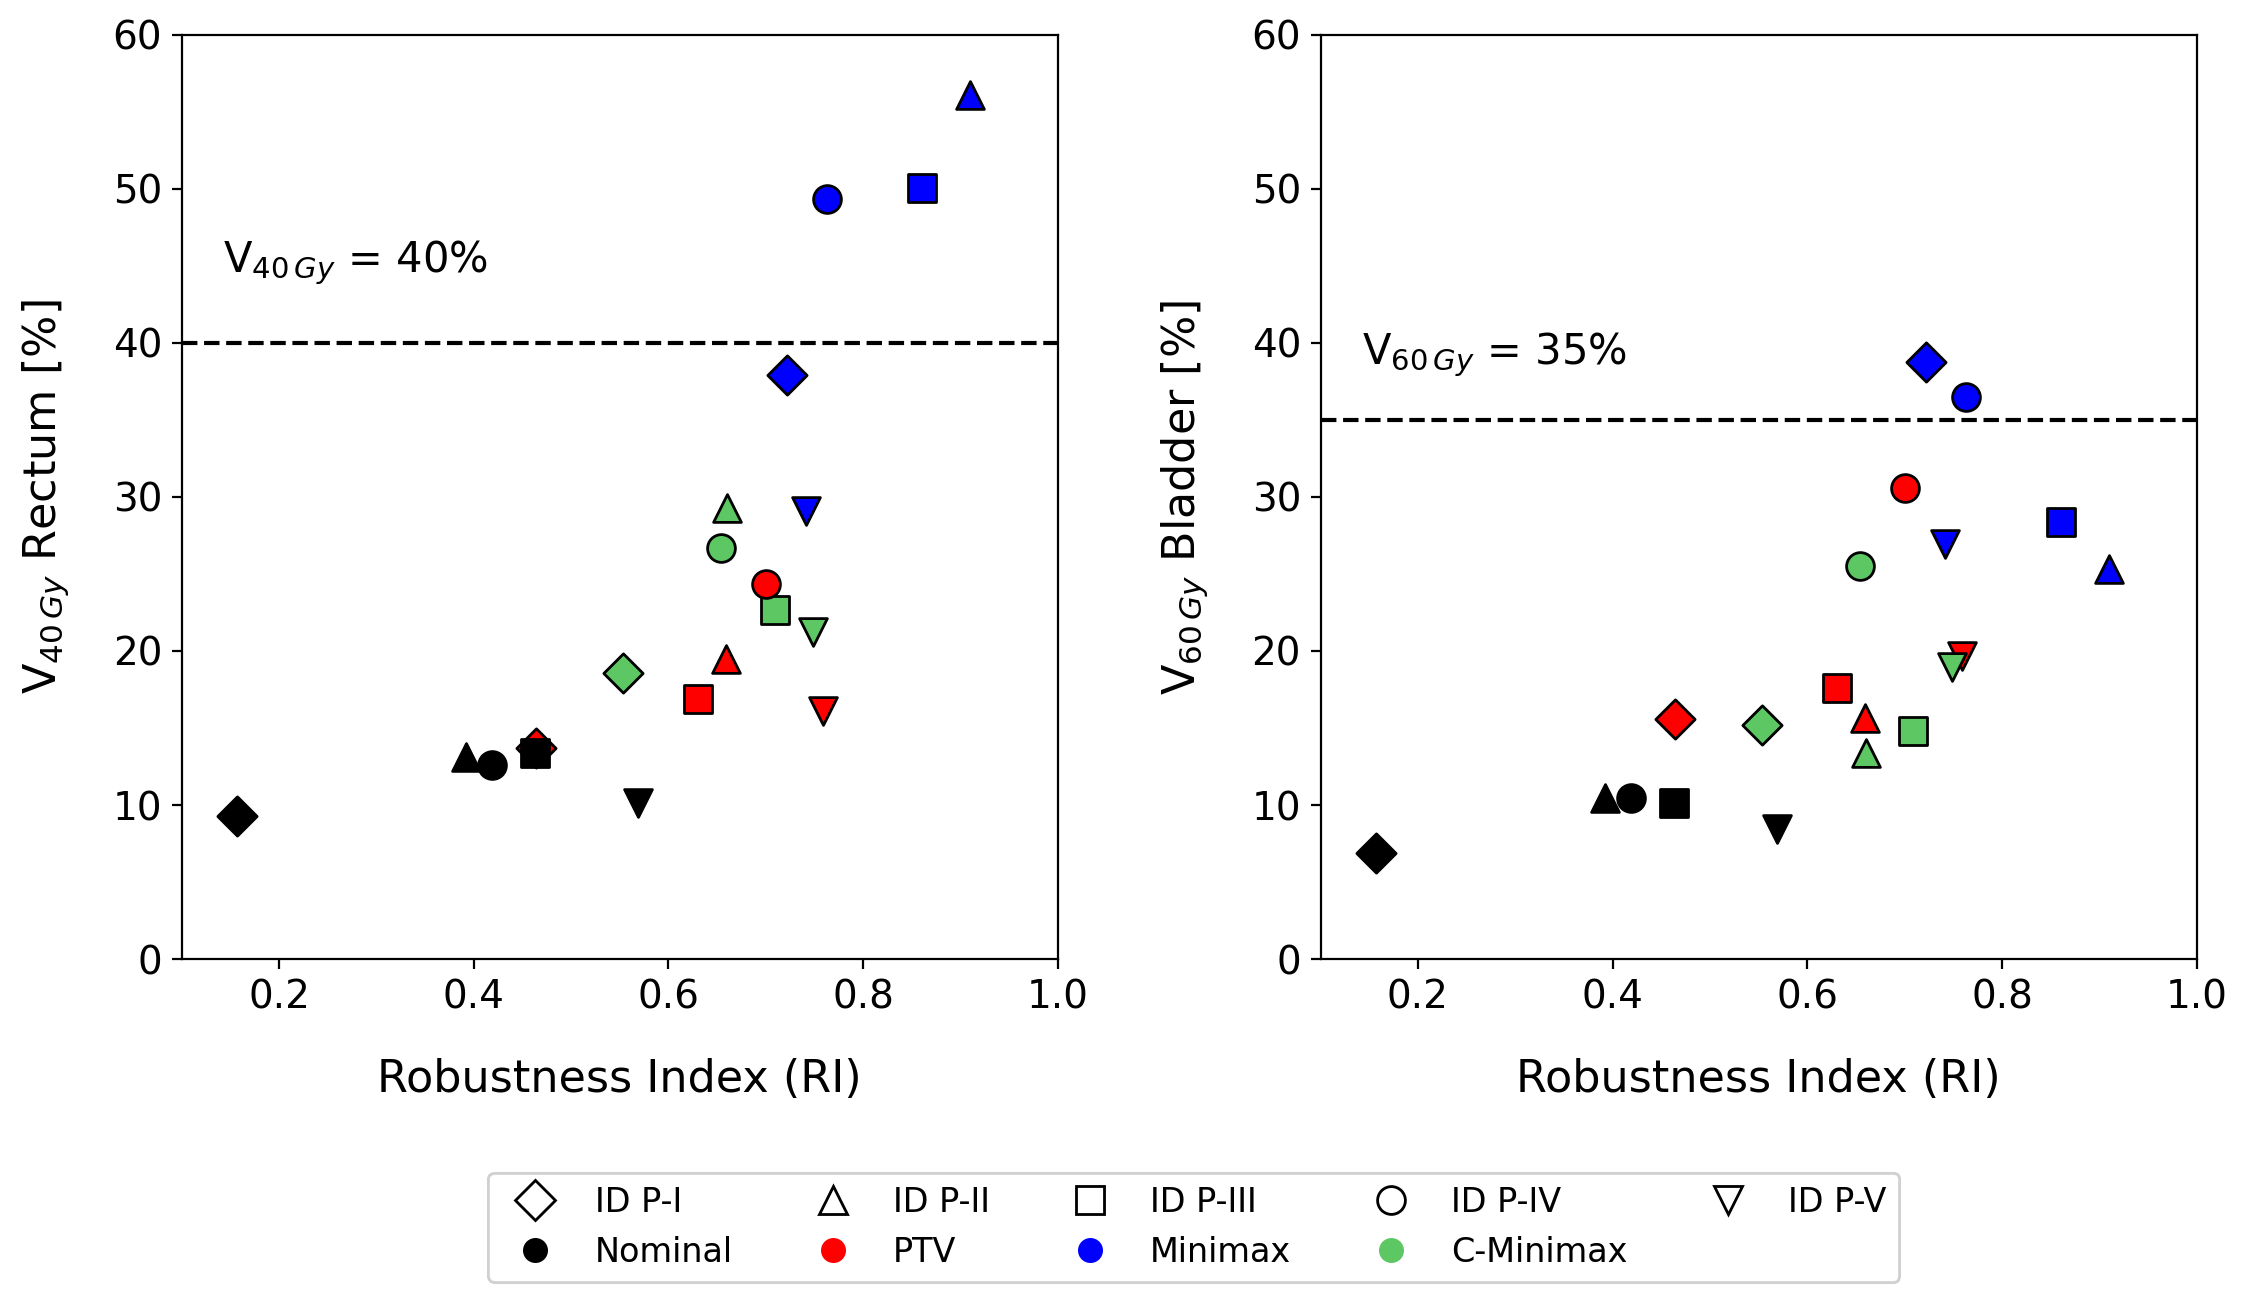

In [401]:
fig=plt.figure(figsize=(13,6))
#fig.suptitle("Proton range (WATER)", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax2=fig.add_subplot(121)
ax2.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax2.set_ylabel('V$_{40  \, Gy}$ Rectum [%]', fontsize=16,labelpad=15)
ax2.set_xlim([0.1, 1])
ax2.set_ylim([0.0, 60])
#ax2.grid(linestyle='--', linewidth=0.5)
ax2.tick_params(axis='x', labelsize=14 )
ax2.tick_params(axis='y', labelsize=14 )
ax2.set_xscale("linear")
ax2.set_yscale("linear")

ax2.axhline(y = 40, color = 'black', linestyle = '--')

data_none1=[]
data_PTV1=[]
data_COWC1=[]
data_CCOWC1=[]
data_STOCH1=[]
data_interval1=[]

# V40 Rectum
for CaseID in prostate_cases:
    df=prostate_df[(prostate_df['CaseID']==CaseID)]
    items=['RI CTV','V40 Rectum']

    data=np.asarray(df[df['Robustness']=='none'].filter(items=items))
    data_none1.append(data)
    ax2.scatter(*zip(*data), color=get_color('none'), marker=get_marker(CaseID),edgecolor='black',s=100,zorder=2)
    
    data=np.asarray(df[df['Robustness']=='PTV'].filter(items=items))
    data_PTV1.append(data)
    ax2.scatter(*zip(*data), color=get_color('PTV'), marker=get_marker(CaseID),edgecolor='black',s=100,zorder=2)

    data=np.asarray(df[(df['Robustness']=='C-COWC')].filter(items=items))
    data_CCOWC1.append([data[get_prostate_cminimax_index(CaseID)][0],data[get_prostate_cminimax_index(CaseID)][1]])
    #ax2.scatter(*zip(*data), color='none', marker=get_marker(CaseID), edgecolor=get_color('C-COWC'),s=100,zorder=1)
    ax2.scatter(data[get_prostate_cminimax_index(CaseID)][0],data[get_prostate_cminimax_index(CaseID)][1], color=get_color('C-COWC'), marker=get_marker(CaseID), edgecolor='black',s=100, zorder=2)
    
    data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==1)].filter(items=items))
    data_COWC1.append(data)
    ax2.scatter(*zip(*data), color=get_color('COWC'), marker=get_marker(CaseID),edgecolor='black',s=100,zorder=2)
    
    #data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==13)].filter(items=items))
    #data_STOCH1.append(data)
    #ax2.scatter(*zip(*data), color=get_color('STOCH'), marker=get_marker(CaseID),edgecolor='black',s=100)
    #data=np.asarray(df[(df['Robustness']=='INTERVAL3')].filter(items=items))
    #data_interval1.append([data[get_prostate_interval_index(CaseID)][0],data[get_prostate_interval_index(CaseID)][1]])
    #ax2.scatter(data[get_prostate_interval_index(CaseID)][0],data[get_prostate_interval_index(CaseID)][1], color=get_color('INTERVAL3'), marker=get_marker(CaseID), edgecolor='black',s=100, zorder=2)

if(w3==0):
    a=np.pi/2
else:
    a=np.arctan((100*w1)/w3);
    
#for i in range(-1000, 1000, 10):
#    ax2.axline([-100*np.cos(a)+i/100, -100*np.sin(a)], [100*np.cos(a)+i/100, 100*np.sin(a)],linestyle='--', color='gray', linewidth=0.5)

    
ax2.annotate('V$_{40 \, Gy}$ = 40%', (0.6, 40),
            xytext=(0.35, 0.78), textcoords='axes fraction',
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')
   
if False:
    offset_x=0.52
    offset_y=2
    dx=0.05
    dy=5
    
    ax2.annotate("", xy=(offset_x+0.015+dx, offset_y+3+dy), xytext=(offset_x+0.015, offset_y+3),
            arrowprops=dict(arrowstyle="->"))
    
    p2 = [(offset_x+0.015+dx, offset_y+3+dy), (offset_x+0.015+dx, offset_y+3)]
    p3 = [(offset_x+0.015+dx, offset_y+3), (offset_x+0.015, offset_y+3)]
    ax2.plot(*zip(*p2),color='gray',linestyle='dotted')
    ax2.plot(*zip(*p3),color='gray',linestyle='dotted')
    
    ax2.annotate('$1\%$', (0.5, 0),
            xytext=(0.255, 0.165), textcoords='axes fraction',
            fontsize=14,
            horizontalalignment='right', verticalalignment='top')

    ax2.annotate('$0.01$', (0.5, 0),
            xytext=(0.18, 0.09), textcoords='axes fraction',
            fontsize=14,
            horizontalalignment='right', verticalalignment='top')

    # add an ellipse
    ellipse = mpatches.Ellipse([offset_x+0.05,offset_y+5], 0.12, 12, ec='black', fc='w', lw=3)
    ax2.add_patch(ellipse)

ax1=fig.add_subplot(122)
ax1.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax1.set_ylabel('V$_{60 \, Gy}$ Bladder [%]', fontsize=16,labelpad=15)
ax1.set_xlim([0.1, 1])
ax1.set_ylim([0, 60])
#ax1.grid(linestyle='--', linewidth=0.5)
ax1.tick_params(axis='x', labelsize=14 )

ax1.tick_params(axis='y', labelsize=14 )
ax1.set_xscale("linear")
ax1.set_yscale("linear")

ax1.axhline(y = 35, color = 'black', linestyle = '--')


data_none2=[]
data_PTV2=[]
data_COWC2=[]
data_CCOWC2=[]
data_STOCH2=[]
data_interval2=[]

# V60 Bladder
for CaseID in prostate_cases:
    df=prostate_df[(prostate_df['CaseID']==CaseID)]
    items=['RI CTV','V60 Bladder']

    data=np.asarray(df[df['Robustness']=='none'].filter(items=items))
    data_none2.append(data)
    ax1.scatter(*zip(*data), color=get_color('none'), marker=get_marker(CaseID),edgecolor='black',s=100,zorder=2)
    
    data=np.asarray(df[df['Robustness']=='PTV'].filter(items=items))
    data_PTV2.append(data)
    ax1.scatter(*zip(*data), color=get_color('PTV'), marker=get_marker(CaseID),edgecolor='black',s=100,zorder=2)
    
    data=np.asarray(df[(df['Robustness']=='C-COWC')].filter(items=items))
    data_CCOWC2.append([data[get_prostate_cminimax_index(CaseID)][0],data[get_prostate_cminimax_index(CaseID)][1]])
    #ax1.scatter(*zip(*data), color='none', marker=get_marker(CaseID), edgecolor=get_color('C-COWC'),s=100,zorder=1)
    ax1.scatter(data[get_prostate_cminimax_index(CaseID)][0],data[get_prostate_cminimax_index(CaseID)][1], color=get_color('C-COWC'), marker=get_marker(CaseID), edgecolor='black',s=100, zorder=2)
    
    data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==1)].filter(items=items))
    data_COWC2.append(data)
    ax1.scatter(*zip(*data), color=get_color('COWC'), marker=get_marker(CaseID),edgecolor='black',s=100,zorder=2)
    
    #data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==13)].filter(items=items))
    #data_STOCH2.append(data)
    #ax1.scatter(*zip(*data), color=get_color('STOCH'), marker=get_marker(CaseID),edgecolor='black',s=100)
    #data=np.asarray(df[(df['Robustness']=='INTERVAL3')].filter(items=items))
    #data_interval2.append([data[get_prostate_interval_index(CaseID)][0],data[get_prostate_interval_index(CaseID)][1]])
    #ax1.scatter(data[get_prostate_interval_index(CaseID)][0],data[get_prostate_interval_index(CaseID)][1], color=get_color('INTERVAL3'), marker=get_marker(CaseID), edgecolor='black',s=100, zorder=2)

    
if(w2==0):
    a=np.pi/2
else:
    a=np.arctan((100*w1)/w2);
    
#for i in range(-1000, 1000, 10):
#    ax1.axline([-100*np.cos(a)+i/100, -100*np.sin(a)], [100*np.cos(a)+i/100, 100*np.sin(a)],linestyle='--', color='gray', linewidth=0.5)


ax1.annotate('V$_{60 \, Gy}$ = 35%', (0.6, 40),
            xytext=(0.35, 0.68), textcoords='axes fraction',
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')
   
if False:
    
    offset_x=0.52
    offset_y=2
    dx=0.05
    dy=5
    
    ax1.annotate("", xy=(offset_x+0.015+dx, offset_y+3+dy), xytext=(offset_x+0.015, offset_y+3),
            arrowprops=dict(arrowstyle="->"))
    
    p2 = [(offset_x+0.015+dx, offset_y+3+dy), (offset_x+0.015+dx, offset_y+3)]
    p3 = [(offset_x+0.015+dx, offset_y+3), (offset_x+0.015, offset_y+3)]
    ax1.plot(*zip(*p2),color='gray',linestyle='dotted')
    ax1.plot(*zip(*p3),color='gray',linestyle='dotted')
    
    ax1.annotate('$1\%$', (0.5, 0),
            xytext=(0.255, 0.165), textcoords='axes fraction',
            fontsize=14,
            horizontalalignment='right', verticalalignment='top')

    ax1.annotate('$0.01$', (0.5, 0),
            xytext=(0.18, 0.09), textcoords='axes fraction',
            fontsize=14,
            horizontalalignment='right', verticalalignment='top')

    # add an ellipse
    ellipse = mpatches.Ellipse([offset_x+0.05,offset_y+5], 0.12, 12, ec='black', fc='w', lw=3)
    ax1.add_patch(ellipse)

# specify the lines and labels of the first legend
legend_elements = []
i=0
for CaseID in prostate_cases:
    legend_elements.append([2*i,Line2D([0], [0], marker=get_marker(CaseID), color='w',mfc='w',mec='black', label='ID '+str(get_case(CaseID)), markersize=10)])
    i+=1
    
i=0
for color in colors:
    legend_elements.append([2*i+1,Line2D([0], [0], marker='o', color='w',mec='w',mfc=color[1], label=get_label(color[0]), markersize=10)])
    i+=1
    
legend_elements = np.array(legend_elements)
legend_elements = legend_elements[legend_elements[:, 0].argsort(kind='mergesort')] 
handles=legend_elements[:,1].tolist()
legend_1 = ax2.legend(handles=handles,loc = (0.35, -0.35), ncol=5,prop={'size': 12})

fig.add_artist(legend_1)

In [402]:
data_none1 = np.array(data_none1)
data_PTV1 = np.array(data_PTV1)
data_COWC1 = np.array(data_COWC1)
data_CCOWC1 = np.array(data_CCOWC1)
data_STOCH1 = np.array(data_STOCH1)
data_interval1 = np.array(data_interval1)

data_none2 = np.array(data_none2)
data_PTV2 = np.array(data_PTV2)
data_COWC2 = np.array(data_COWC2)
data_CCOWC2 = np.array(data_CCOWC2)
data_STOCH2 = np.array(data_STOCH2)
data_interval2 = np.array(data_interval2)

#facecolor=np.array([get_color('none'),get_color('PTV'),get_color('COWC'),get_color('C-COWC'),get_color('STOCH'),get_color('INTERVAL3')])
facecolor=np.array([get_color('none'),get_color('PTV'),get_color('COWC'),get_color('C-COWC')])

In [403]:
#x1=np.array([data_none1.mean(0)[0,0],data_PTV1.mean(0)[0,0],data_COWC1.mean(0)[0,0],data_CCOWC1.mean(0)[0],data_STOCH1.mean(0)[0,0],data_interval1.mean(0)[0]])
#y1=np.array([data_none1.mean(0)[0,1],data_PTV1.mean(0)[0,1],data_COWC1.mean(0)[0,1],data_CCOWC1.mean(0)[1],data_STOCH1.mean(0)[0,1],data_interval1.mean(0)[1]])
#xerr1=np.array([[data_none1.std(0)[0,0],data_PTV1.std(0)[0,0],data_COWC1.std(0)[0,0],data_CCOWC1.std(0)[0],data_STOCH1.std(0)[0,0],data_interval1.std(0)[0]],[data_none1.std(0)[0,0],data_PTV1.std(0)[0,0],data_COWC1.std(0)[0,0],data_CCOWC1.std(0)[0],data_STOCH1.std(0)[0,0],data_interval1.std(0)[0]]])
#yerr1=np.array([[data_none1.std(0)[0,1],data_PTV1.std(0)[0,1],data_COWC1.std(0)[0,1],data_CCOWC1.std(0)[1],data_STOCH1.std(0)[0,1],data_interval1.std(0)[1]],[data_none1.std(0)[0,1],data_PTV1.std(0)[0,1],data_COWC1.std(0)[0,1],data_CCOWC1.std(0)[1],data_STOCH1.std(0)[0,1],data_interval1.std(0)[1]]])

#x2=np.array([data_none2.mean(0)[0,0],data_PTV2.mean(0)[0,0],data_COWC2.mean(0)[0,0],data_CCOWC2.mean(0)[0],data_STOCH2.mean(0)[0,0],data_interval2.mean(0)[0]])
#y2=np.array([data_none2.mean(0)[0,1],data_PTV2.mean(0)[0,1],data_COWC2.mean(0)[0,1],data_CCOWC2.mean(0)[1],data_STOCH2.mean(0)[0,1],data_interval2.mean(0)[1]])
#xerr2=np.array([[data_none2.std(0)[0,0],data_PTV2.std(0)[0,0],data_COWC2.std(0)[0,0],data_CCOWC2.std(0)[0],data_STOCH2.std(0)[0,0],data_interval2.std(0)[0]],[data_none2.std(0)[0,0],data_PTV2.std(0)[0,0],data_COWC2.std(0)[0,0],data_CCOWC2.std(0)[0],data_STOCH2.std(0)[0,0],data_interval2.std(0)[0]]])
#yerr2=np.array([[data_none2.std(0)[0,1],data_PTV2.std(0)[0,1],data_COWC2.std(0)[0,1],data_CCOWC2.std(0)[1],data_STOCH2.std(0)[0,1],data_interval2.std(0)[1]],[data_none2.std(0)[0,1],data_PTV2.std(0)[0,1],data_COWC2.std(0)[0,1],data_CCOWC2.std(0)[1],data_STOCH2.std(0)[0,1],data_interval2.std(0)[1]]])

x1=np.array([data_none1.mean(0)[0,0],data_PTV1.mean(0)[0,0],data_COWC1.mean(0)[0,0],data_CCOWC1.mean(0)[0]])
y1=np.array([data_none1.mean(0)[0,1],data_PTV1.mean(0)[0,1],data_COWC1.mean(0)[0,1],data_CCOWC1.mean(0)[1]])
xerr1=np.array([[data_none1.std(0)[0,0],data_PTV1.std(0)[0,0],data_COWC1.std(0)[0,0],data_CCOWC1.std(0)[0]],[data_none1.std(0)[0,0],data_PTV1.std(0)[0,0],data_COWC1.std(0)[0,0],data_CCOWC1.std(0)[0]]])
yerr1=np.array([[data_none1.std(0)[0,1],data_PTV1.std(0)[0,1],data_COWC1.std(0)[0,1],data_CCOWC1.std(0)[1]],[data_none1.std(0)[0,1],data_PTV1.std(0)[0,1],data_COWC1.std(0)[0,1],data_CCOWC1.std(0)[1]]])

x2=np.array([data_none2.mean(0)[0,0],data_PTV2.mean(0)[0,0],data_COWC2.mean(0)[0,0],data_CCOWC2.mean(0)[0]])
y2=np.array([data_none2.mean(0)[0,1],data_PTV2.mean(0)[0,1],data_COWC2.mean(0)[0,1],data_CCOWC2.mean(0)[1]])
xerr2=np.array([[data_none2.std(0)[0,0],data_PTV2.std(0)[0,0],data_COWC2.std(0)[0,0],data_CCOWC2.std(0)[0]],[data_none2.std(0)[0,0],data_PTV2.std(0)[0,0],data_COWC2.std(0)[0,0],data_CCOWC2.std(0)[0]]])
yerr2=np.array([[data_none2.std(0)[0,1],data_PTV2.std(0)[0,1],data_COWC2.std(0)[0,1],data_CCOWC2.std(0)[1]],[data_none2.std(0)[0,1],data_PTV2.std(0)[0,1],data_COWC2.std(0)[0,1],data_CCOWC2.std(0)[1]]])


In [404]:
print(x1)
#print(xerr1)
print(y1)
#print(yerr1)
print(y2)
#print(yerr2)

print("-----------------")
print("Minimax vs PTV Results")
print("RI: ",round((x1[2]-x1[1])/x1[1]*100,0),"%")
print("V40 Rectum: ",round((y1[2]-y1[1])/y1[1]*100,0),"%")
print("V60 Bladder: ",round((y2[2]-y2[1])/y2[1]*100,0),"%")

#print("-----------------")
#print("Stochastic vs PTV Results")
#print("RI: ",round((x1[4]-x1[1])/x1[1]*100,0),"%")
#print("V40 Rectum: ",round((y1[4]-y1[1])/y1[1]*100,0),"%")
#print("V60 Bladder: ",round((y2[4]-y2[1])/y2[1]*100,0),"%")

print("-----------------")
print("C-Minimax vs PTV Results")
print("RI: ",round((x1[3]-x1[1])/x1[1]*100,0),"%")
print("V40 Rectum: ",round((y1[3]-y1[1])/y1[1]*100,0),"%")
print("V60 Bladder: ",round((y2[3]-y2[1])/y2[1]*100,0),"%")

#print("-----------------")
#print("Inteval3 vs PTV Results")
#print("RI: ",round((x1[5]-x1[1])/x1[1]*100,0),"%")
#print("V40 Rectum: ",round((y1[5]-y1[1])/y1[1]*100,0),"%")
#print("V60 Bladder: ",round((y2[5]-y2[1])/y2[1]*100,0),"%")

[0.39984 0.64248 0.79934 0.66526]
[11.676 18.072 44.476 23.68 ]
[ 9.258 19.794 31.158 17.548]
-----------------
Minimax vs PTV Results
RI:  24.0 %
V40 Rectum:  146.0 %
V60 Bladder:  57.0 %
-----------------
C-Minimax vs PTV Results
RI:  4.0 %
V40 Rectum:  31.0 %
V60 Bladder:  -11.0 %


<>:7: SyntaxWarning: invalid escape sequence '\,'
<>:21: SyntaxWarning: invalid escape sequence '\,'
<>:28: SyntaxWarning: invalid escape sequence '\,'
<>:43: SyntaxWarning: invalid escape sequence '\,'
<>:7: SyntaxWarning: invalid escape sequence '\,'
<>:21: SyntaxWarning: invalid escape sequence '\,'
<>:28: SyntaxWarning: invalid escape sequence '\,'
<>:43: SyntaxWarning: invalid escape sequence '\,'
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/3930602703.py:7: SyntaxWarning: invalid escape sequence '\,'
  ax1.set_ylabel('V$_{40  \, Gy}$ Rectum [%]', fontsize=16,labelpad=15)
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/3930602703.py:21: SyntaxWarning: invalid escape sequence '\,'
  ax1.annotate('V$_{40 \, Gy}$ = 40%', (0.6, 40),
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/3930602703.py:28: SyntaxWarning: invalid escape sequence '\,'
  ax2.set_ylabel('V$_{60 \, Gy}$ Bladder [%]', fontsize=16,labelpad=15)
/var/folders/bt/2c02p06

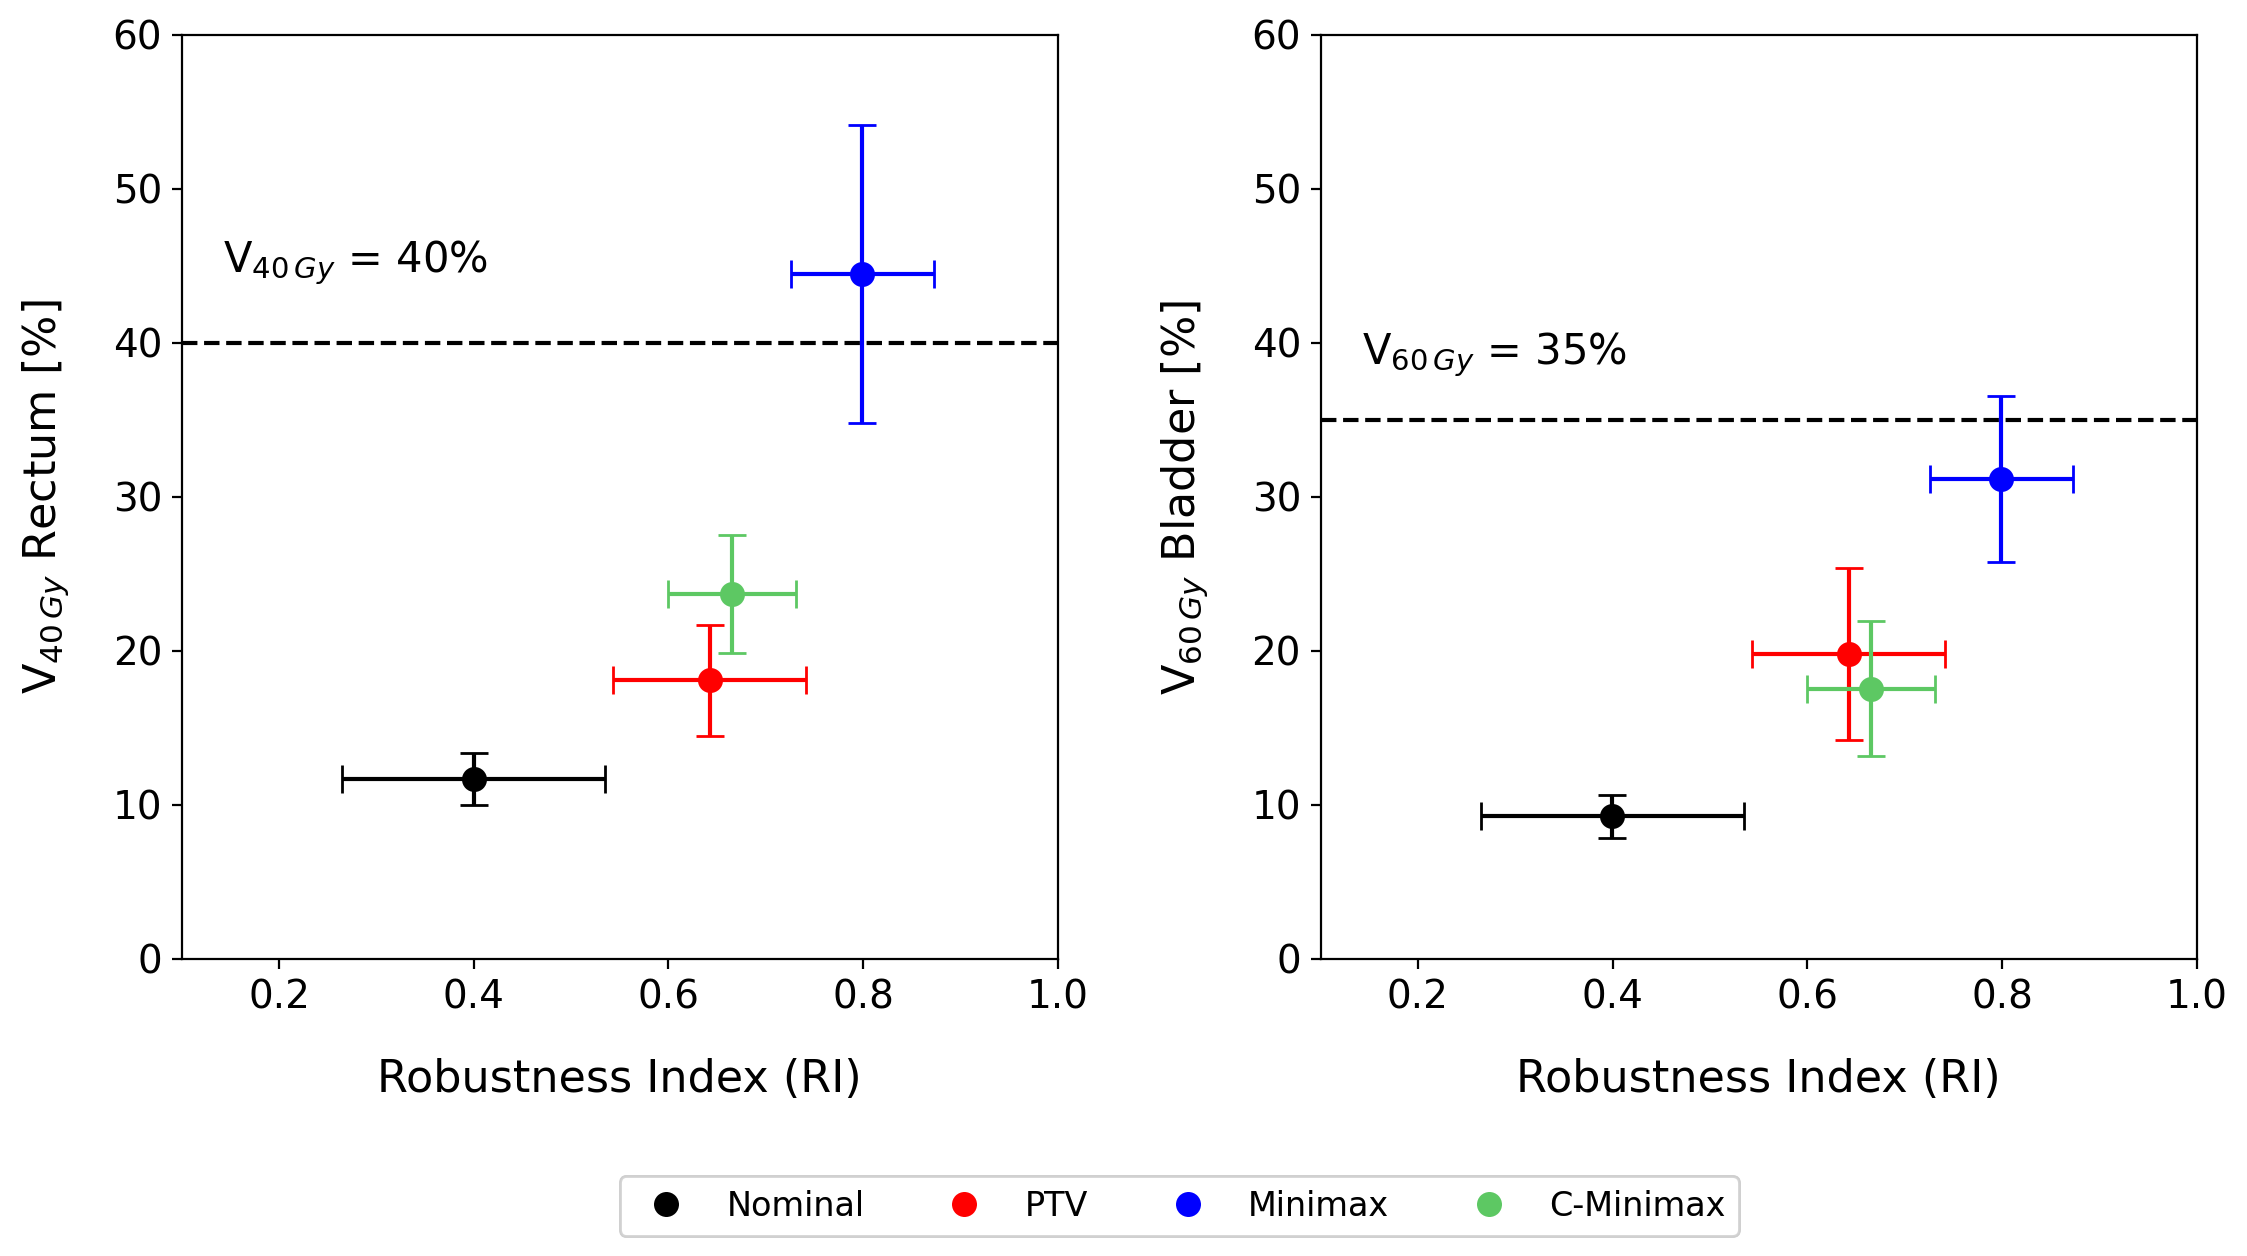

In [405]:
fig=plt.figure(figsize=(13,6))
#fig.suptitle("Proton range (WATER)", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1=fig.add_subplot(121)
ax1.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax1.set_ylabel('V$_{40  \, Gy}$ Rectum [%]', fontsize=16,labelpad=15)
ax1.set_xlim([0.1, 1])
ax1.set_ylim([0.0, 60])
#ax1.grid(linestyle='--', linewidth=0.5)
ax1.tick_params(axis='x', labelsize=14 )
ax1.tick_params(axis='y', labelsize=14 )
ax1.set_xscale("linear")
ax1.set_yscale("linear")

ax1.axhline(y = 40, color = 'black', linestyle = '--')

# Call function to create error boxes
make_error_boxes(ax1, x1, y1, xerr1, yerr1, facecolor, alpha=0)
    
ax1.annotate('V$_{40 \, Gy}$ = 40%', (0.6, 40),
            xytext=(0.35, 0.78), textcoords='axes fraction',
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')

ax2=fig.add_subplot(122)
ax2.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax2.set_ylabel('V$_{60 \, Gy}$ Bladder [%]', fontsize=16,labelpad=15)
ax2.set_xlim([0.1, 1])
ax2.set_ylim([0, 60])
#ax2.grid(linestyle='--', linewidth=0.5)
ax2.tick_params(axis='x', labelsize=14 )

ax2.tick_params(axis='y', labelsize=14 )
ax2.set_xscale("linear")
ax2.set_yscale("linear")

ax2.axhline(y = 35, color = 'black', linestyle = '--')

# Call function to create error boxes
make_error_boxes(ax2, x2, y2, xerr2, yerr2, facecolor, alpha=0)

ax2.annotate('V$_{60 \, Gy}$ = 35%', (0.6, 40),
            xytext=(0.35, 0.68), textcoords='axes fraction',
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')

# specify the lines and labels of the first legend
legend_elements = [] 
i=0
for color in colors:
    legend_elements.append([2*i,Line2D([0], [0], marker='o', color='w',mec='w',mfc=color[1], label=get_label(color[0]), markersize=10)])
    i+=1
    
legend_elements = np.array(legend_elements)
legend_elements = legend_elements[legend_elements[:, 0].argsort(kind='mergesort')] 
handles=legend_elements[:,1].tolist()
legend_1 = ax1.legend(handles=handles,loc = (0.50, -0.30), ncol=6,prop={'size': 12})

fig.add_artist(legend_1)

In [406]:
print("Robustness Index")
print("Nominal")
print("mean:", np.round(data_none1.mean(0),3)[0,0],"std:", data_none1.std(0)[0,0])
print("PTV")
print("mean:", np.round(data_PTV1.mean(0),3)[0,0],"std:", data_PTV1.std(0)[0,0])
print("minimax")
print("mean:", np.round(data_COWC1.mean(0),3)[0,0],"std:", data_COWC1.std(0)[0,0])
print("c-minimax")
print("mean:", np.round(data_CCOWC1.mean(0),3)[0],"std:", data_CCOWC1.std(0)[0])

print("\n","V40Gy Rectum")
print("Nominal")
print("mean:", np.round(data_none1.mean(0),3)[0,1],"std:", data_none1.std(0)[0,1])
print("PTV")
print("mean:", np.round(data_PTV1.mean(0),3)[0,1],"std:", data_PTV1.std(0)[0,1])
print("minimax")
print("mean:", np.round(data_COWC1.mean(0),3)[0,1],"std:", data_COWC1.std(0)[0,1])
print("c-minimax")
print("mean:", np.round(data_CCOWC1.mean(0),3)[1],"std:", data_CCOWC1.std(0)[1])

print("\n","V20Gy Bladder")
print("Nominal")
print("mean:", np.round(data_none2.mean(0),3)[0,1],"std:", data_none2.std(0)[0,1])
print("PTV")
print("mean:", np.round(data_PTV2.mean(0),3)[0,1],"std:", data_PTV2.std(0)[0,1])
print("minimax")
print("mean:", np.round(data_COWC2.mean(0),3)[0,1],"std:", data_COWC2.std(0)[0,1])
print("c-minimax")
print("mean:", np.round(data_CCOWC2.mean(0),3)[1],"std:", data_CCOWC2.std(0)[1])

Robustness Index
Nominal
mean: 0.4 std: 0.13552097402247373
PTV
mean: 0.642 std: 0.09920908022958384
minimax
mean: 0.799 std: 0.07317804588809405
c-minimax
mean: 0.665 std: 0.0655561621817507

 V40Gy Rectum
Nominal
mean: 11.676 std: 1.6722511773056103
PTV
mean: 18.072 std: 3.6257269615899097
minimax
mean: 44.476 std: 9.683899214675874
c-minimax
mean: 23.68 std: 3.836180392004527

 V20Gy Bladder
Nominal
mean: 9.258 std: 1.4074857015259514
PTV
mean: 19.794 std: 5.59205364781133
minimax
mean: 31.158 std: 5.400308880054918
c-minimax
mean: 17.548 std: 4.382425812264253


<>:7: SyntaxWarning: invalid escape sequence '\,'
<>:55: SyntaxWarning: invalid escape sequence '\,'
<>:74: SyntaxWarning: invalid escape sequence '\%'
<>:90: SyntaxWarning: invalid escape sequence '\,'
<>:137: SyntaxWarning: invalid escape sequence '\,'
<>:157: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\,'
<>:55: SyntaxWarning: invalid escape sequence '\,'
<>:74: SyntaxWarning: invalid escape sequence '\%'
<>:90: SyntaxWarning: invalid escape sequence '\,'
<>:137: SyntaxWarning: invalid escape sequence '\,'
<>:157: SyntaxWarning: invalid escape sequence '\%'
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/800120530.py:7: SyntaxWarning: invalid escape sequence '\,'
  ax2.set_ylabel('V$_{40  \, Gy}$ Rectum [%]', fontsize=16,labelpad=15)
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/800120530.py:55: SyntaxWarning: invalid escape sequence '\,'
  ax2.annotate('V$_{40 \, Gy}$ = 40%', (0.6, 40),
/var/folders/bt

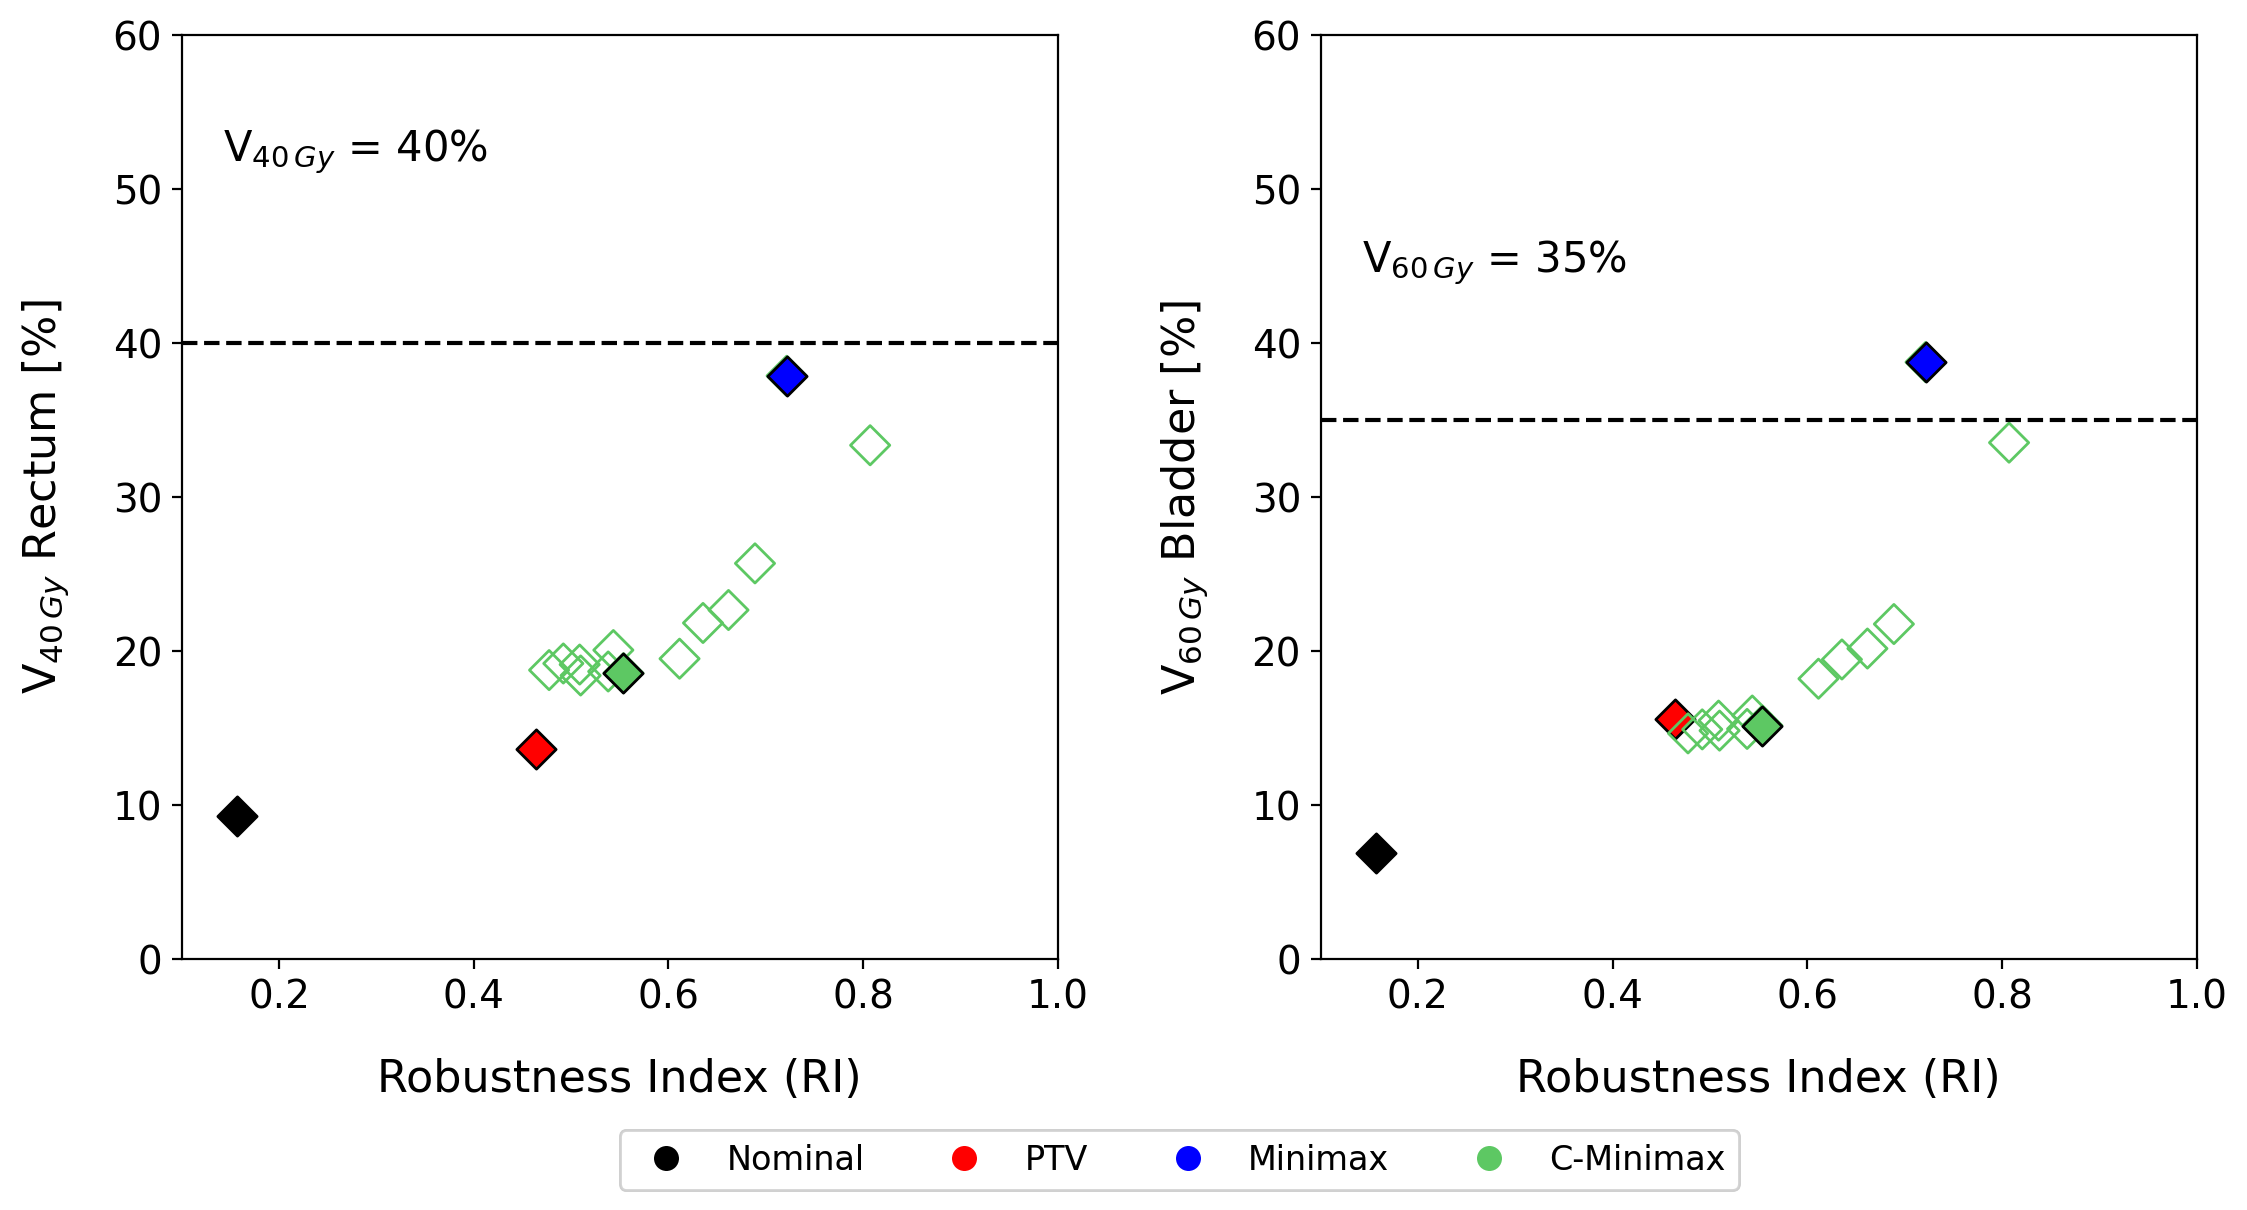

In [407]:
fig=plt.figure(figsize=(13,6))
#fig.suptitle("Proton range (WATER)", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax2=fig.add_subplot(121)
ax2.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax2.set_ylabel('V$_{40  \, Gy}$ Rectum [%]', fontsize=16,labelpad=15)
ax2.set_xlim([0.1, 1])
ax2.set_ylim([0.0, 60])
#ax2.grid(linestyle='--', linewidth=0.5)
ax2.tick_params(axis='x', labelsize=14 )
ax2.tick_params(axis='y', labelsize=14 )
ax2.set_xscale("linear")
ax2.set_yscale("linear")

ax2.axhline(y = 40, color = 'black', linestyle = '--')

# V40 Rectum
for CaseID in [prostate_case_detailed]:
    df=prostate_df[(prostate_df['CaseID']==CaseID)]
    items=['RI CTV','V40 Rectum']

    data=np.asarray(df[df['Robustness']=='none'].filter(items=items))
    ax2.scatter(*zip(*data), color=get_color('none'), marker=get_marker(CaseID),edgecolor='black',s=100)

    data=np.asarray(df[df['Robustness']=='PTV'].filter(items=items))
    ax2.scatter(*zip(*data), color=get_color('PTV'), marker=get_marker(CaseID),edgecolor='black',s=100)

    data=np.asarray(df[(df['Robustness']=='C-COWC')].filter(items=items))
    ax2.scatter(*zip(*data), color='none', marker=get_marker(CaseID), edgecolor=get_color('C-COWC'),s=100)
    ax2.scatter(data[get_prostate_cminimax_index(CaseID)][0],data[get_prostate_cminimax_index(CaseID)][1], color=get_color('C-COWC'), marker=get_marker(CaseID), edgecolor='black',s=100)

    data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==1)].filter(items=items))
    ax2.scatter(*zip(*data), color=get_color('COWC'), marker=get_marker(CaseID),edgecolor='black',s=100)
    
    #data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==13)].filter(items=items))
    #ax2.scatter(*zip(*data), color=get_color('STOCH'), marker=get_marker(CaseID),edgecolor='black',s=100)
    ##data=np.asarray(df[(df['Robustness']=='INTERVAL3') & (df['Objectives']==4) & (df['theta2']==0)].filter(items=items))
    ##ax2.scatter(*zip(*data), color=get_color('INTERVAL3'), marker=get_marker(CaseID),s=100)
    
    #data=np.asarray(df[(df['Robustness']=='INTERVAL3')].filter(items=items))
    #ax2.scatter(*zip(*data), color='none', marker=get_marker(CaseID), edgecolor=get_color('INTERVAL3'),s=100)
    #ax2.scatter(data[get_prostate_interval_index(CaseID)][0],data[get_prostate_interval_index(CaseID)][1], color=get_color('INTERVAL3'), marker=get_marker(CaseID), edgecolor='black',s=100)

    
if(w3==0):
    a=np.pi/2
else:
    a=np.arctan((100*w1)/w3);
    
#for i in range(-1000, 1000, 10):
#    ax2.axline([-100*np.cos(a)+i/100, -100*np.sin(a)], [100*np.cos(a)+i/100, 100*np.sin(a)],linestyle='--', color='gray', linewidth=0.5)

    
ax2.annotate('V$_{40 \, Gy}$ = 40%', (0.6, 40),
            xytext=(0.35, 0.90), textcoords='axes fraction',
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')
   
if False:
    offset_x=0.52
    offset_y=2
    dx=0.05
    dy=5
    
    ax2.annotate("", xy=(offset_x+0.015+dx, offset_y+3+dy), xytext=(offset_x+0.015, offset_y+3),
            arrowprops=dict(arrowstyle="->"))
    
    p2 = [(offset_x+0.015+dx, offset_y+3+dy), (offset_x+0.015+dx, offset_y+3)]
    p3 = [(offset_x+0.015+dx, offset_y+3), (offset_x+0.015, offset_y+3)]
    ax2.plot(*zip(*p2),color='gray',linestyle='dotted')
    ax2.plot(*zip(*p3),color='gray',linestyle='dotted')
    
    ax2.annotate('$1\%$', (0.5, 0),
            xytext=(0.255, 0.165), textcoords='axes fraction',
            fontsize=14,
            horizontalalignment='right', verticalalignment='top')

    ax2.annotate('$0.01$', (0.5, 0),
            xytext=(0.18, 0.09), textcoords='axes fraction',
            fontsize=14,
            horizontalalignment='right', verticalalignment='top')

    # add an ellipse
    ellipse = mpatches.Ellipse([offset_x+0.05,offset_y+5], 0.12, 12, ec='black', fc='w', lw=3)
    ax2.add_patch(ellipse)

ax1=fig.add_subplot(122)
ax1.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax1.set_ylabel('V$_{60 \, Gy}$ Bladder [%]', fontsize=16,labelpad=15)
ax1.set_xlim([0.1, 1])
ax1.set_ylim([0, 60])
#ax1.grid(linestyle='--', linewidth=0.5)
ax1.tick_params(axis='x', labelsize=14 )

ax1.tick_params(axis='y', labelsize=14 )
ax1.set_xscale("linear")
ax1.set_yscale("linear")

ax1.axhline(y = 35, color = 'black', linestyle = '--')

# V60 Bladder
for CaseID in [prostate_case_detailed]:
    df=prostate_df[(prostate_df['CaseID']==CaseID)]
    items=['RI CTV','V60 Bladder']

    data=np.asarray(df[df['Robustness']=='none'].filter(items=items))
    ax1.scatter(*zip(*data), color=get_color('none'), marker=get_marker(CaseID),edgecolor='black',s=100)
    
    data=np.asarray(df[df['Robustness']=='PTV'].filter(items=items))
    ax1.scatter(*zip(*data), color=get_color('PTV'), marker=get_marker(CaseID),edgecolor='black',s=100)
    
    data=np.asarray(df[(df['Robustness']=='C-COWC')].filter(items=items))
    ax1.scatter(*zip(*data), color='none', marker=get_marker(CaseID), edgecolor=get_color('C-COWC'),s=100)
    ax1.scatter(data[get_prostate_cminimax_index(CaseID)][0],data[get_prostate_cminimax_index(CaseID)][1], color=get_color('C-COWC'), marker=get_marker(CaseID), edgecolor='black',s=100)
    
    data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==1)].filter(items=items))
    ax1.scatter(*zip(*data), color=get_color('COWC'), marker=get_marker(CaseID),edgecolor='black',s=100)
    
    #data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==13)].filter(items=items))
    #ax1.scatter(*zip(*data), color=get_color('STOCH'), marker=get_marker(CaseID),edgecolor='black',s=100)
    ##data=np.asarray(df[(df['Robustness']=='INTERVAL3') & (df['Objectives']==4) & (df['theta2']==0)].filter(items=items))
    ##ax1.scatter(*zip(*data), color=get_color('INTERVAL3'), marker=get_marker(CaseID),s=100)
    #data=np.asarray(df[(df['Robustness']=='INTERVAL3')].filter(items=items))
    #ax1.scatter(*zip(*data), color='none', marker=get_marker(CaseID), edgecolor=get_color('INTERVAL3'),s=100)
    #ax1.scatter(data[get_prostate_interval_index(CaseID)][0],data[get_prostate_interval_index(CaseID)][1], color=get_color('INTERVAL3'), marker=get_marker(CaseID), edgecolor='black',s=100)

if(w2==0):
    a=np.pi/2
else:
    a=np.arctan((100*w1)/w2);
    
#for i in range(-1000, 1000, 10):
#    ax1.axline([-100*np.cos(a)+i/100, -100*np.sin(a)], [100*np.cos(a)+i/100, 100*np.sin(a)],linestyle='--', color='gray', linewidth=0.5)


ax1.annotate('V$_{60 \, Gy}$ = 35%', (0.6, 40),
            xytext=(0.35, 0.78), textcoords='axes fraction',
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')
   
if False:
    
    offset_x=0.52
    offset_y=2
    dx=0.05
    dy=5
    
    ax1.annotate("", xy=(offset_x+0.015+dx, offset_y+3+dy), xytext=(offset_x+0.015, offset_y+3),
            arrowprops=dict(arrowstyle="->"))
    
    p2 = [(offset_x+0.015+dx, offset_y+3+dy), (offset_x+0.015+dx, offset_y+3)]
    p3 = [(offset_x+0.015+dx, offset_y+3), (offset_x+0.015, offset_y+3)]
    ax1.plot(*zip(*p2),color='gray',linestyle='dotted')
    ax1.plot(*zip(*p3),color='gray',linestyle='dotted')
    
    ax1.annotate('$1\%$', (0.5, 0),
            xytext=(0.255, 0.165), textcoords='axes fraction',
            fontsize=14,
            horizontalalignment='right', verticalalignment='top')

    ax1.annotate('$0.01$', (0.5, 0),
            xytext=(0.18, 0.09), textcoords='axes fraction',
            fontsize=14,
            horizontalalignment='right', verticalalignment='top')

    # add an ellipse
    ellipse = mpatches.Ellipse([offset_x+0.05,offset_y+5], 0.12, 12, ec='black', fc='w', lw=3)
    ax1.add_patch(ellipse)

# specify the lines and labels of the first legend
legend_elements = [] 
i=0
for color in colors:
    legend_elements.append([2*i,Line2D([0], [0], marker='o', color='w',mec='w',mfc=color[1], label=get_label(color[0]), markersize=10)])
    i+=1
    
legend_elements = np.array(legend_elements)
legend_elements = legend_elements[legend_elements[:, 0].argsort(kind='mergesort')] 
handles=legend_elements[:,1].tolist()
legend_1 = ax2.legend(handles=handles,loc = (0.50, -0.25), ncol=6,prop={'size': 12})

fig.add_artist(legend_1)

In [408]:
breast_cminimax_indexes=[]
w1=0.5 # 1% - 0.01
w2=1 # 1%
w3=1 # 1%
for CaseID in breast_cases:
    df=breast_df[(breast_df['CaseID']==CaseID)]
    items=['RI CTV','V20 Left Lung','Dmean Heart','p2']
    data=np.asarray(df[(df['Robustness']=='C-COWC')].filter(items=items))
    index=np.argmax((100*w1*data[:,0]-w2*data[:,1]-w3*data[:,2]))
    breast_cminimax_indexes.append([CaseID,index])
    print('CaseID ', CaseID,'(',get_case(CaseID),')')
    print('p2 =',data[index][3])
    print('RI =',data[index][0])
    print('V20 Left Lung =',data[index][1],'%')
    print('Dmean Heart =',data[index][2],'Gy')
    print('\n')

def get_breast_cminimax_index(var):
    for index in breast_cminimax_indexes:
        if (var == index[0]):
            return index[1]

CaseID  3832 ( B-I )
p2 = 8.0
RI = 0.6147
V20 Left Lung = 17.53 %
Dmean Heart = 3.77 Gy


CaseID  3749 ( B-II )
p2 = 4.0
RI = 0.4945
V20 Left Lung = 20.5 %
Dmean Heart = 3.85 Gy


CaseID  3477 ( B-III )
p2 = 13.0
RI = 0.4895
V20 Left Lung = 14.57 %
Dmean Heart = 6.0 Gy


CaseID  3833 ( B-IV )
p2 = 12.0
RI = 0.2809
V20 Left Lung = 24.89 %
Dmean Heart = 5.63 Gy


CaseID  3929 ( B-V )
p2 = 13.0
RI = 0.3332
V20 Left Lung = 20.8 %
Dmean Heart = 5.13 Gy


CaseID  4136 ( B-IV )
p2 = 12.0
RI = 0.4818
V20 Left Lung = 20.31 %
Dmean Heart = 4.35 Gy


CaseID  4155 ( B-VII )
p2 = 12.0
RI = 0.3102
V20 Left Lung = 19.09 %
Dmean Heart = 4.09 Gy


CaseID  4203 ( B-VIII )
p2 = 12.0
RI = 0.3609
V20 Left Lung = 21.77 %
Dmean Heart = 4.77 Gy


CaseID  4357 ( B-IX )
p2 = 12.0
RI = 0.5465
V20 Left Lung = 18.81 %
Dmean Heart = 4.2 Gy


CaseID  4390 ( B-X )
p2 = 12.0
RI = 0.6533
V20 Left Lung = 14.32 %
Dmean Heart = 4.97 Gy


CaseID  4428 ( B-XI )
p2 = 12.0
RI = 0.488
V20 Left Lung = 20.59 %
Dmean Heart = 3.15

In [409]:
#breast_cminimax_indexes[0]=[3832, 11]

In [410]:
print(breast_cminimax_indexes)

[[3832, np.int64(7)], [3749, np.int64(1)], [3477, np.int64(1)], [3833, np.int64(1)], [3929, np.int64(1)], [4136, np.int64(1)], [4155, np.int64(1)], [4203, np.int64(1)], [4357, np.int64(1)], [4390, np.int64(1)], [4428, np.int64(1)], [4494, np.int64(1)], [4531, np.int64(0)], [4585, np.int64(1)], [4681, np.int64(1)]]


<>:7: SyntaxWarning: invalid escape sequence '\,'
<>:60: SyntaxWarning: invalid escape sequence '\,'
<>:124: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\,'
<>:60: SyntaxWarning: invalid escape sequence '\,'
<>:124: SyntaxWarning: invalid escape sequence '\%'
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/2126382865.py:7: SyntaxWarning: invalid escape sequence '\,'
  ax1.set_ylabel('V$_{20 \, Gy}$ Ipsilateral Lung [%]', fontsize=16,labelpad=15)
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/2126382865.py:60: SyntaxWarning: invalid escape sequence '\,'
  ax1.annotate('V$_{20 \, Gy}$ = 20%', (0.6, 40),
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/2126382865.py:124: SyntaxWarning: invalid escape sequence '\%'
  ax3.set_ylabel('D$_{5\%}$ Skin [$Gy$]', fontsize=16,labelpad=15)
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/2126382865.py:33: UserWarning: You passed a edgecolor/

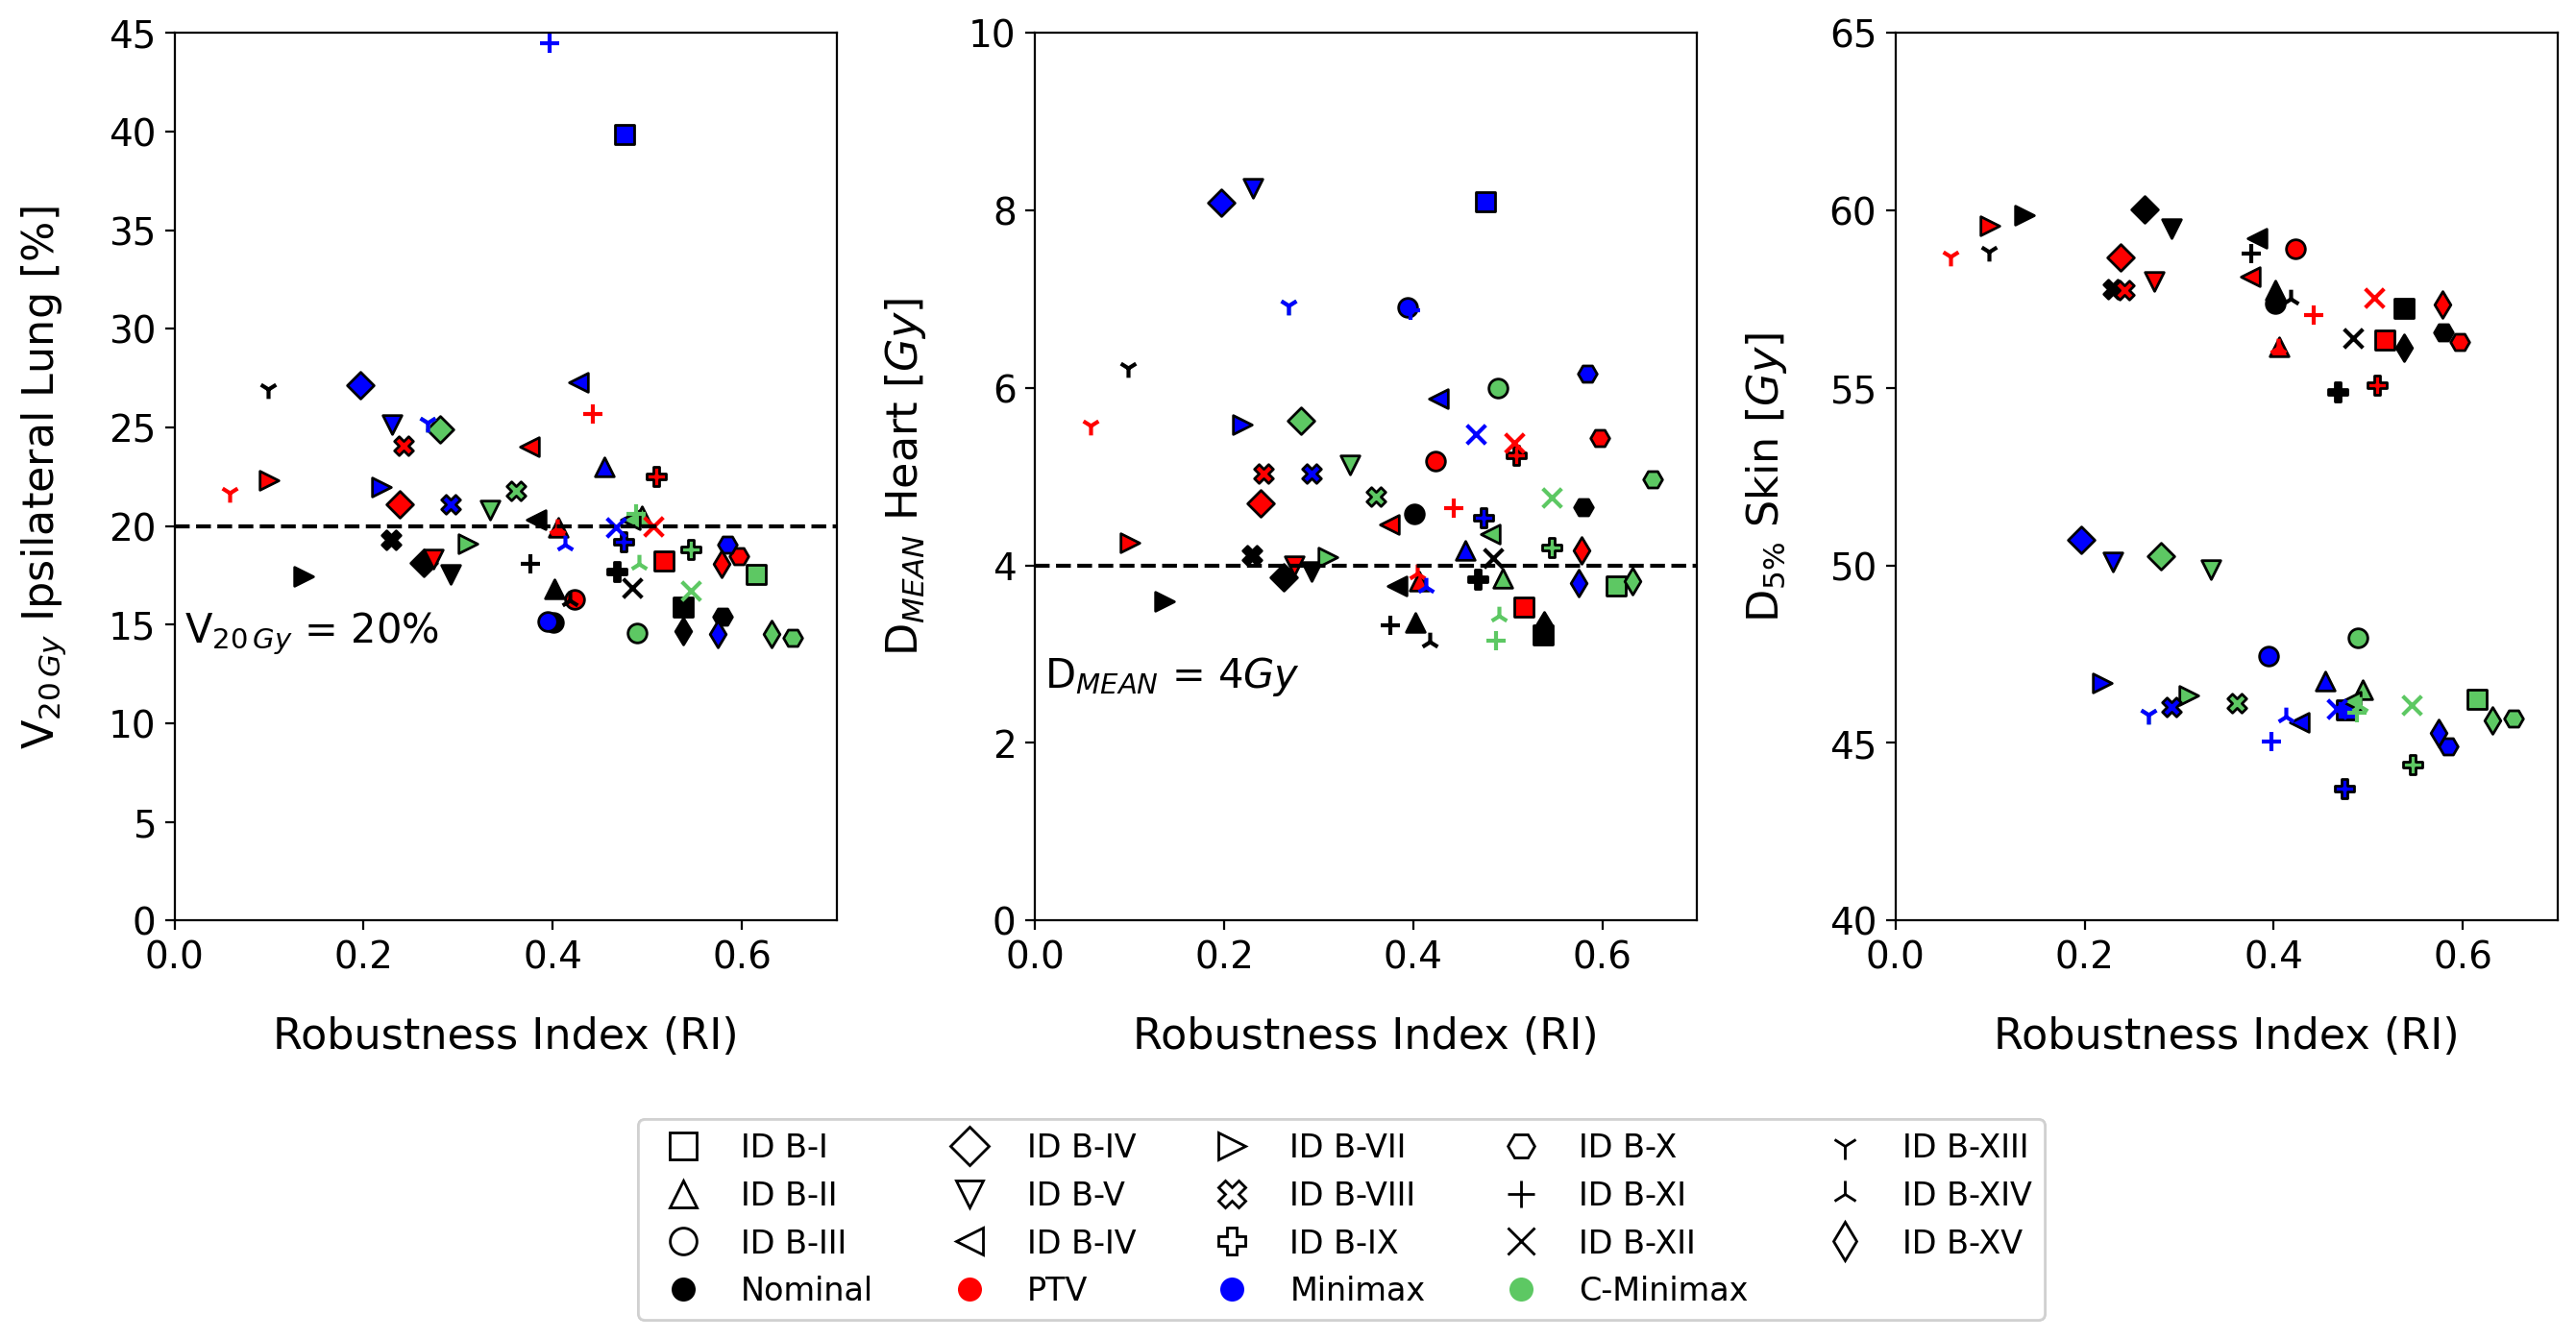

In [411]:
fig=plt.figure(figsize=(16,6))
#fig.suptitle("Proton range (WATER)", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1=fig.add_subplot(131)
ax1.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax1.set_ylabel('V$_{20 \, Gy}$ Ipsilateral Lung [%]', fontsize=16,labelpad=15)
ax1.set_xlim([0.0, 0.7])
ax1.set_ylim([0, 45])
#ax1.grid(linestyle='--', linewidth=0.5)
ax1.tick_params(axis='x', labelsize=14 )

ax1.tick_params(axis='y', labelsize=14 )
ax1.set_xscale("linear")
ax1.set_yscale("linear")

x1=np.linspace(0,10,10)

ax1.axhline(y = 20, color = 'black', linestyle = '--')

data_none1=[]
data_PTV1=[]
data_COWC1=[]
data_CCOWC1=[]

# V20 Left Lung
for CaseID in breast_cases:
    df=breast_df[(breast_df['CaseID']==CaseID)]
    items=['RI CTV','V20 Left Lung']
    
    data=np.asarray(df[df['Robustness']=='none'].filter(items=items))
    data_none1.append(data)
    ax1.scatter(*zip(*data), color=get_color('none'), marker=get_marker(CaseID),edgecolor='black',s=50)
    
    data=np.asarray(df[df['Robustness']=='PTV'].filter(items=items))
    data_PTV1.append(data)
    ax1.scatter(*zip(*data), color=get_color('PTV'), marker=get_marker(CaseID),edgecolor='black',s=50)

    data=np.asarray(df[(df['Robustness']=='C-COWC')].filter(items=items))
    data_CCOWC1.append([data[get_breast_cminimax_index(CaseID)][0],data[get_breast_cminimax_index(CaseID)][1]])
    #ax1.scatter(*zip(*data), color='none', marker=get_marker(CaseID), edgecolor=get_color('C-COWC'),s=50)
    ax1.scatter(data[get_breast_cminimax_index(CaseID)][0],data[get_breast_cminimax_index(CaseID)][1], color=get_color('C-COWC'), marker=get_marker(CaseID), edgecolor='black',s=50)
    
    data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==1)].filter(items=items))
    data_COWC1.append(data)
    ax1.scatter(*zip(*data), color=get_color('COWC'), marker=get_marker(CaseID),edgecolor='black',s=50)
    
    #data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==13)].filter(items=items))
    #ax1.scatter(*zip(*data), color=get_color('STOCH'), marker=get_marker(CaseID),edgecolor='black',s=50)
    
if(w1==0):
    a=np.pi/2
else:
    a=np.arctan((100*w1)/w2);
    
#for i in range(-1000, 1000, 10):
#    ax1.axline([-100*np.cos(a)+i/100, -100*np.sin(a)], [100*np.cos(a)+i/100, 100*np.sin(a)],linestyle='--', color='gray', linewidth=0.5)

    
ax1.annotate('V$_{20 \, Gy}$ = 20%', (0.6, 40),
            xytext=(0.40, 0.35), textcoords='axes fraction',
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')
    
ax2=fig.add_subplot(132)
ax2.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax2.set_ylabel('D$_{MEAN}$ Heart [$Gy$]', fontsize=16,labelpad=15)
ax2.set_xlim([0.0, 0.7])
ax2.set_ylim([0.0, 10])
#ax2.grid(linestyle='--', linewidth=0.5)
ax2.tick_params(axis='x', labelsize=14 )
ax2.tick_params(axis='y', labelsize=14 )
ax2.set_xscale("linear")
ax2.set_yscale("linear")

ax2.axhline(y = 4, color = 'black', linestyle = '--')

data_none2=[]
data_PTV2=[]
data_COWC2=[]
data_CCOWC2=[]

# Dmean Heart
for CaseID in breast_cases:
    df=breast_df[(breast_df['CaseID']==CaseID)]
    items=['RI CTV','Dmean Heart']

    data=np.asarray(df[df['Robustness']=='none'].filter(items=items))
    data_none2.append(data)
    ax2.scatter(*zip(*data), color=get_color('none'), marker=get_marker(CaseID),edgecolor='black',s=50)
    
    data=np.asarray(df[df['Robustness']=='PTV'].filter(items=items))
    data_PTV2.append(data)
    ax2.scatter(*zip(*data), color=get_color('PTV'), marker=get_marker(CaseID),edgecolor='black',s=50)

    data=np.asarray(df[(df['Robustness']=='C-COWC')].filter(items=items))
    data_CCOWC2.append([data[get_breast_cminimax_index(CaseID)][0],data[get_breast_cminimax_index(CaseID)][1]])
    #ax2.scatter(*zip(*data), color='none', marker=get_marker(CaseID), edgecolor=get_color('C-COWC'),s=50)
    ax2.scatter(data[get_breast_cminimax_index(CaseID)][0],data[get_breast_cminimax_index(CaseID)][1], color=get_color('C-COWC'), marker=get_marker(CaseID), edgecolor='black',s=50)
    
    data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==1)].filter(items=items))
    data_COWC2.append(data)
    ax2.scatter(*zip(*data), color=get_color('COWC'), marker=get_marker(CaseID),edgecolor='black',s=50)
    
    #data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==13)].filter(items=items))
    #ax2.scatter(*zip(*data), color=get_color('STOCH'), marker=get_marker(CaseID),edgecolor='black',s=50)

if(w1==0):
    a=np.pi/2
else:
    a=np.arctan((100*w1)/w2);
    
#for i in range(-1000, 1000, 10):
#    ax2.axline([-100*np.cos(a)+i/100, -100*np.sin(a)], [100*np.cos(a)+i/100, 100*np.sin(a)],linestyle='--', color='gray', linewidth=0.5)

    
ax2.annotate('D$_{MEAN}$ = 4$Gy$', (0.6, 4),
            xytext=(0.40, 0.30), textcoords='axes fraction',
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')

ax3=fig.add_subplot(133)
ax3.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax3.set_ylabel('D$_{5\%}$ Skin [$Gy$]', fontsize=16,labelpad=15)
ax3.set_xlim([0.0, 0.7])
ax3.set_ylim([40, 65])
#ax3.grid(linestyle='--', linewidth=0.5)
ax3.tick_params(axis='x', labelsize=14 )
ax3.tick_params(axis='y', labelsize=14 )
ax3.set_xscale("linear")
ax3.set_yscale("linear")

data_none3=[]
data_PTV3=[]
data_COWC3=[]
data_CCOWC3=[]

# Tail width CTV
for CaseID in breast_cases:
    df=breast_df[(breast_df['CaseID']==CaseID)]
    items=['RI CTV','D5 Skin']

    data=np.asarray(df[df['Robustness']=='none'].filter(items=items))
    data_none3.append(data)
    ax3.scatter(*zip(*data), color=get_color('none'), marker=get_marker(CaseID),edgecolor='black',s=50)
    
    data=np.asarray(df[df['Robustness']=='PTV'].filter(items=items))
    data_PTV3.append(data)
    ax3.scatter(*zip(*data), color=get_color('PTV'), marker=get_marker(CaseID),edgecolor='black',s=50)

    data=np.asarray(df[(df['Robustness']=='C-COWC')].filter(items=items))
    data_CCOWC3.append([data[get_breast_cminimax_index(CaseID)][0],data[get_breast_cminimax_index(CaseID)][1]])
    #ax3.scatter(*zip(*data), color='none', marker=get_marker(CaseID), edgecolor=get_color('C-COWC'),s=50)
    ax3.scatter(data[get_breast_cminimax_index(CaseID)][0],data[get_breast_cminimax_index(CaseID)][1], color=get_color('C-COWC'), marker=get_marker(CaseID), edgecolor='black',s=50)
    
    data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==1)].filter(items=items))
    data_COWC3.append(data)
    ax3.scatter(*zip(*data), color=get_color('COWC'), marker=get_marker(CaseID),edgecolor='black',s=50)
    
    #data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==13)].filter(items=items))
    #ax3.scatter(*zip(*data), color=get_color('STOCH'), marker=get_marker(CaseID),edgecolor='black',s=50)

if(w1==0):
    a=np.pi/2
else:
    a=np.arctan((100*w1)/w2);
    
#for i in range(-1000, 1000, 10):
#    ax3.axline([-100*np.cos(a)+i/100, -100*np.sin(a)], [100*np.cos(a)+i/100, 100*np.sin(a)],linestyle='--', color='gray', linewidth=0.5)
    
# specify the lines and labels of the first legend
legend_elements = []
i=0
for CaseID in breast_cases:
    if i % 4 == 0:
        i+=1
    legend_elements.append([i,Line2D([0], [0], marker=get_marker(CaseID), color='w',mfc='w',mec='black', label='ID '+str(get_case(CaseID)), markersize=10)])
    i+=1

i=0
for color in colors:
    legend_elements.append([4*i+3,Line2D([0], [0], marker='o', color='w',mec='w',mfc=color[1], label=get_label(color[0]), markersize=10)])
    i+=1
    
legend_elements = np.array(legend_elements)
legend_elements = legend_elements[legend_elements[:, 0].argsort(kind='mergesort')] 
handles=legend_elements[:,1].tolist()
legend_1 = ax1.legend(handles=handles,loc = (0.7, -0.45), ncol=5,prop={'size': 12})

fig.add_artist(legend_1)

In [412]:
data_none1 = np.array(data_none1[1:15])
data_PTV1 = np.array(data_PTV1[1:15])
data_COWC1 = np.array(data_COWC1[1:15])
data_CCOWC1 = np.array(data_CCOWC1[1:15])

data_none2 = np.array(data_none2[1:15])
data_PTV2 = np.array(data_PTV2[1:15])
data_COWC2 = np.array(data_COWC2[1:15])
data_CCOWC2 = np.array(data_CCOWC2[1:15])

data_none3 = np.array(data_none3[1:15])
data_PTV3 = np.array(data_PTV3[1:15])
data_COWC3 = np.array(data_COWC3[1:15])
data_CCOWC3 = np.array(data_CCOWC3[1:15])

facecolor=np.array([get_color('none'),get_color('PTV'),get_color('COWC'),get_color('C-COWC')])

In [413]:
x1=np.array([data_none1.mean(0)[0,0],data_PTV1.mean(0)[0,0],data_COWC1.mean(0)[0,0],data_CCOWC1.mean(0)[0]])
y1=np.array([data_none1.mean(0)[0,1],data_PTV1.mean(0)[0,1],data_COWC1.mean(0)[0,1],data_CCOWC1.mean(0)[1]])
xerr1=np.array([[data_none1.std(0)[0,0],data_PTV1.std(0)[0,0],data_COWC1.std(0)[0,0],data_CCOWC1.std(0)[0]],[data_none1.std(0)[0,0],data_PTV1.std(0)[0,0],data_COWC1.std(0)[0,0],data_CCOWC1.std(0)[0]]])
yerr1=np.array([[data_none1.std(0)[0,1],data_PTV1.std(0)[0,1],data_COWC1.std(0)[0,1],data_CCOWC1.std(0)[1]],[data_none1.std(0)[0,1],data_PTV1.std(0)[0,1],data_COWC1.std(0)[0,1],data_CCOWC1.std(0)[1]]])

x2=np.array([data_none2.mean(0)[0,0],data_PTV2.mean(0)[0,0],data_COWC2.mean(0)[0,0],data_CCOWC2.mean(0)[0]])
y2=np.array([data_none2.mean(0)[0,1],data_PTV2.mean(0)[0,1],data_COWC2.mean(0)[0,1],data_CCOWC2.mean(0)[1]])
xerr2=np.array([[data_none2.std(0)[0,0],data_PTV2.std(0)[0,0],data_COWC2.std(0)[0,0],data_CCOWC2.std(0)[0]],[data_none2.std(0)[0,0],data_PTV2.std(0)[0,0],data_COWC2.std(0)[0,0],data_CCOWC2.std(0)[0]]])
yerr2=np.array([[data_none2.std(0)[0,1],data_PTV2.std(0)[0,1],data_COWC2.std(0)[0,1],data_CCOWC2.std(0)[1]],[data_none2.std(0)[0,1],data_PTV2.std(0)[0,1],data_COWC2.std(0)[0,1],data_CCOWC2.std(0)[1]]])

x3=np.array([data_none3.mean(0)[0,0],data_PTV3.mean(0)[0,0],data_COWC3.mean(0)[0,0],data_CCOWC3.mean(0)[0]])
y3=np.array([data_none3.mean(0)[0,1],data_PTV3.mean(0)[0,1],data_COWC3.mean(0)[0,1],data_CCOWC3.mean(0)[1]])
xerr3=np.array([[data_none3.std(0)[0,0],data_PTV3.std(0)[0,0],data_COWC3.std(0)[0,0],data_CCOWC3.std(0)[0]],[data_none3.std(0)[0,0],data_PTV3.std(0)[0,0],data_COWC3.std(0)[0,0],data_CCOWC3.std(0)[0]]])
yerr3=np.array([[data_none3.std(0)[0,1],data_PTV3.std(0)[0,1],data_COWC3.std(0)[0,1],data_CCOWC3.std(0)[1]],[data_none3.std(0)[0,1],data_PTV3.std(0)[0,1],data_COWC3.std(0)[0,1],data_CCOWC3.std(0)[1]]])

In [414]:
x1

array([0.36215   , 0.36822143, 0.38512857, 0.45536429])

<>:22: SyntaxWarning: invalid escape sequence '\,'
<>:50: SyntaxWarning: invalid escape sequence '\%'
<>:22: SyntaxWarning: invalid escape sequence '\,'
<>:50: SyntaxWarning: invalid escape sequence '\%'
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/3272885060.py:22: SyntaxWarning: invalid escape sequence '\,'
  ax1.annotate('V$_{20 \, Gy}$ = 20%', (0.6, 40),
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/3272885060.py:50: SyntaxWarning: invalid escape sequence '\%'
  ax3.set_ylabel('D$_5\%$ Skin [$Gy$]', fontsize=16,labelpad=15)


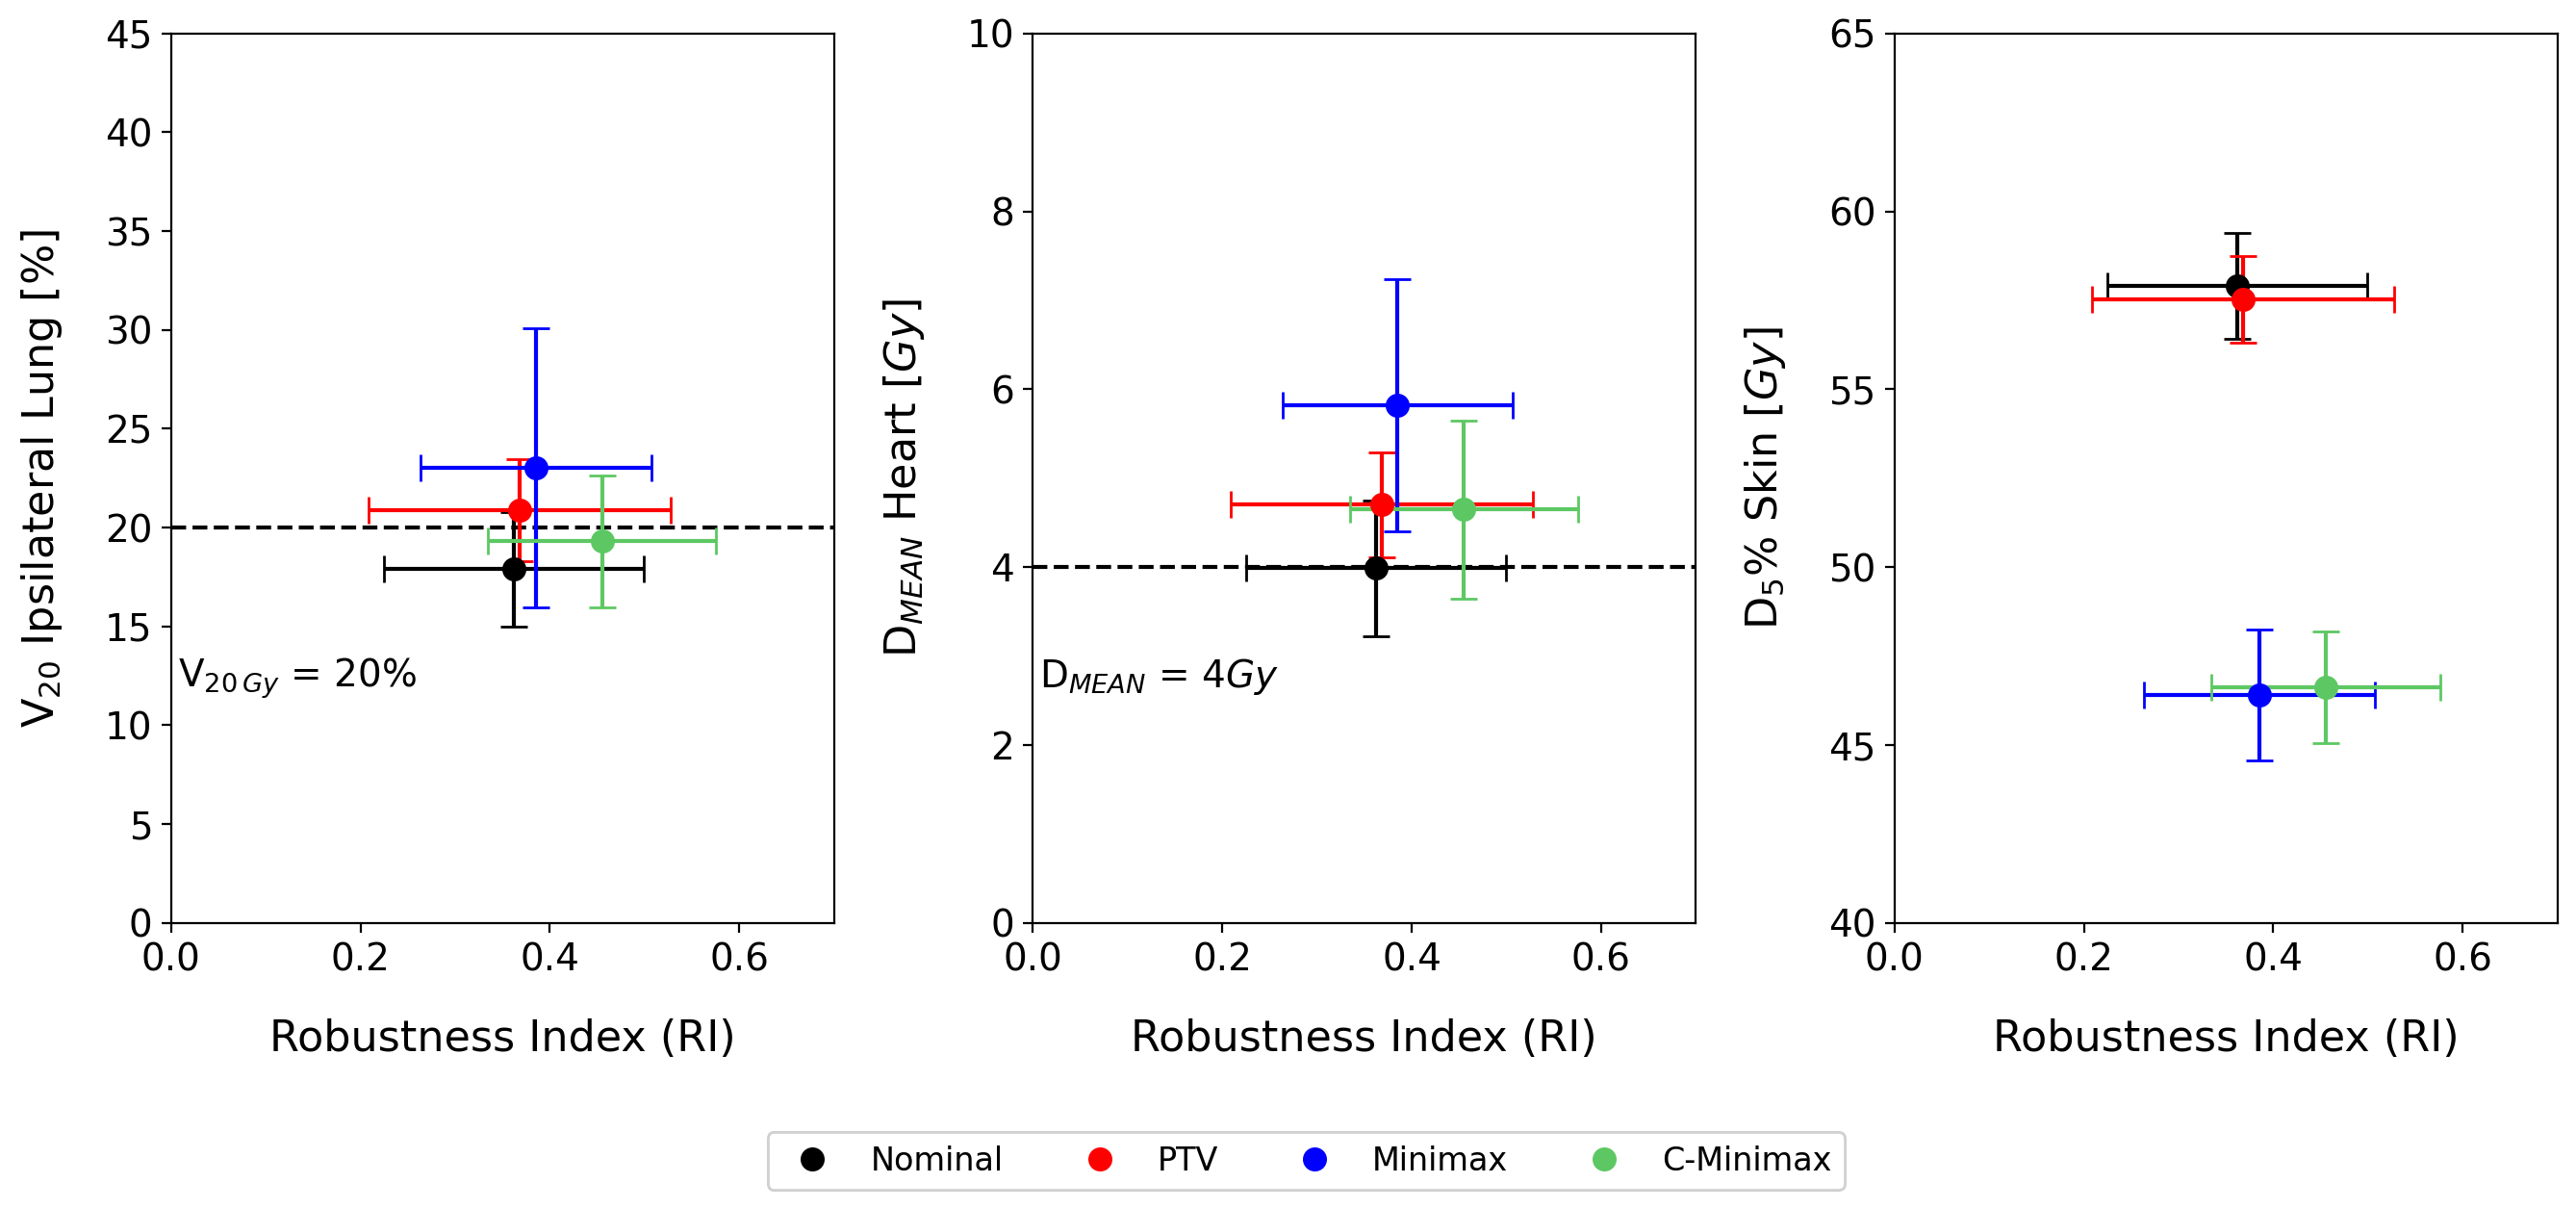

In [415]:
fig=plt.figure(figsize=(16,6))
#fig.suptitle("Proton range (WATER)", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1=fig.add_subplot(131)
ax1.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax1.set_ylabel('V$_{20}$ Ipsilateral Lung [%]', fontsize=16,labelpad=15)
ax1.set_xlim([0.0, 0.7])
ax1.set_ylim([0, 45])
#ax1.grid(linestyle='--', linewidth=0.5)
ax1.tick_params(axis='x', labelsize=14 )

ax1.tick_params(axis='y', labelsize=14 )
ax1.set_xscale("linear")
ax1.set_yscale("linear")

ax1.axhline(y = 20, color = 'black', linestyle = '--')

# Call function to create error boxes
make_error_boxes(ax1, x1, y1, xerr1, yerr1, facecolor, alpha=0)
    
ax1.annotate('V$_{20 \, Gy}$ = 20%', (0.6, 40),
            xytext=(0.37, 0.30), textcoords='axes fraction',
            fontsize=14,
            horizontalalignment='right', verticalalignment='top')
    
ax2=fig.add_subplot(132)
ax2.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax2.set_ylabel('D$_{MEAN}$ Heart [$Gy$]', fontsize=16,labelpad=15)
ax2.set_xlim([0.0, 0.7])
ax2.set_ylim([0.0, 10])
#ax2.grid(linestyle='--', linewidth=0.5)
ax2.tick_params(axis='x', labelsize=14 )
ax2.tick_params(axis='y', labelsize=14 )
ax2.set_xscale("linear")
ax2.set_yscale("linear")

ax2.axhline(y = 4, color = 'black', linestyle = '--')

# Call function to create error boxes
make_error_boxes(ax2, x2, y2, xerr2, yerr2, facecolor, alpha=0)

ax2.annotate('D$_{MEAN}$ = 4$Gy$', (0.6, 4),
            xytext=(0.37, 0.30), textcoords='axes fraction',
            fontsize=14,
            horizontalalignment='right', verticalalignment='top')

ax3=fig.add_subplot(133)
ax3.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax3.set_ylabel('D$_5\%$ Skin [$Gy$]', fontsize=16,labelpad=15)
ax3.set_xlim([0.0, 0.7])
ax3.set_ylim([40, 65])
#ax3.grid(linestyle='--', linewidth=0.5)
ax3.tick_params(axis='x', labelsize=14 )
ax3.tick_params(axis='y', labelsize=14 )
ax3.set_xscale("linear")
ax3.set_yscale("linear")

# Call function to create error boxes
make_error_boxes(ax3, x3, y3, xerr3, yerr3, facecolor, alpha=0)

# specify the lines and labels of the first legend
legend_elements = []
    
i=0
for color in colors:
    legend_elements.append([2*i,Line2D([0], [0], marker='o', color='w',mec='w',mfc=color[1], label=get_label(color[0]), markersize=10)])
    i+=1
    
legend_elements = np.array(legend_elements)
legend_elements = legend_elements[legend_elements[:, 0].argsort(kind='mergesort')] 
handles=legend_elements[:,1].tolist()
legend_1 = ax1.legend(handles=handles,loc = (0.9, -0.30), ncol=5,prop={'size': 12})

fig.add_artist(legend_1)

In [416]:
print("Robustness Index")
print("Nominal")
print("mean:", np.round(data_none1.mean(0),3)[0,0],"std:", data_none1.std(0)[0,0])
print("PTV")
print("mean:", np.round(data_PTV1.mean(0),3)[0,0],"std:", data_PTV1.std(0)[0,0])
print("minimax")
print("mean:", np.round(data_COWC1.mean(0),3)[0,0],"std:", data_COWC1.std(0)[0,0])
print("c-minimax")
print("mean:", np.round(data_CCOWC1.mean(0),3)[0],"std:", data_CCOWC1.std(0)[0])

print("\n","V20Gy Ipsilateral Lung")
print("Nominal")
print("mean:", np.round(data_none1.mean(0),3)[0,1],"std:", data_none1.std(0)[0,1])
print("PTV")
print("mean:", np.round(data_PTV1.mean(0),3)[0,1],"std:", data_PTV1.std(0)[0,1])
print("minimax")
print("mean:", np.round(data_COWC1.mean(0),3)[0,1],"std:", data_COWC1.std(0)[0,1])
print("c-minimax")
print("mean:", np.round(data_CCOWC1.mean(0),3)[1],"std:", data_CCOWC1.std(0)[1])

print("\n","DMEAN Heart")
print("Nominal")
print("mean:", np.round(data_none2.mean(0),3)[0,1],"std:", data_none2.std(0)[0,1])
print("PTV")
print("mean:", np.round(data_PTV2.mean(0),3)[0,1],"std:", data_PTV2.std(0)[0,1])
print("minimax")
print("mean:", np.round(data_COWC2.mean(0),3)[0,1],"std:", data_COWC2.std(0)[0,1])
print("c-minimax")
print("mean:", np.round(data_CCOWC2.mean(0),3)[1],"std:", data_CCOWC2.std(0)[1])

print("\n","D5 Skin")
print("Nominal")
print("mean:", np.round(data_none3.mean(0),3)[0,1],"std:", data_none3.std(0)[0,1])
print("PTV")
print("mean:", np.round(data_PTV3.mean(0),3)[0,1],"std:", data_PTV3.std(0)[0,1])
print("minimax")
print("mean:", np.round(data_COWC3.mean(0),3)[0,1],"std:", data_COWC3.std(0)[0,1])
print("c-minimax")
print("mean:", np.round(data_CCOWC3.mean(0),3)[1],"std:", data_CCOWC3.std(0)[1])

Robustness Index
Nominal
mean: 0.362 std: 0.13724734059354304
PTV
mean: 0.368 std: 0.15954633979134816
minimax
mean: 0.385 std: 0.12169033550410667
c-minimax
mean: 0.455 std: 0.1204333580221435

 V20Gy Ipsilateral Lung
Nominal
mean: 17.896 std: 2.9139779249230386
PTV
mean: 20.876 std: 2.5725799009824315
minimax
mean: 23.024 std: 7.060775669940555
c-minimax
mean: 19.304 std: 3.3538626071673097

 DMEAN Heart
Nominal
mean: 3.988 std: 0.7596538551154972
PTV
mean: 4.701 std: 0.5883494727122787
minimax
mean: 5.819 std: 1.4186807611442458
c-minimax
mean: 4.649 std: 1.0004988551635996

 D5 Skin
Nominal
mean: 57.904 std: 1.4889579975161644
PTV
mean: 57.524 std: 1.2282898348384015
minimax
mean: 46.408 std: 1.8511779206433812
c-minimax
mean: 46.619 std: 1.5762924726026175


<>:51: SyntaxWarning: invalid escape sequence '\,'
<>:105: SyntaxWarning: invalid escape sequence '\%'
<>:51: SyntaxWarning: invalid escape sequence '\,'
<>:105: SyntaxWarning: invalid escape sequence '\%'
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/2408095795.py:51: SyntaxWarning: invalid escape sequence '\,'
  ax1.annotate('V$_{20 \, Gy}$ = 20%', (0.5, 20),
/var/folders/bt/2c02p06j2sj1z_l21n6mgwr40000gn/T/ipykernel_1225/2408095795.py:105: SyntaxWarning: invalid escape sequence '\%'
  ax3.set_ylabel('D$_5\%$ Skin [$Gy$]', fontsize=16,labelpad=15)


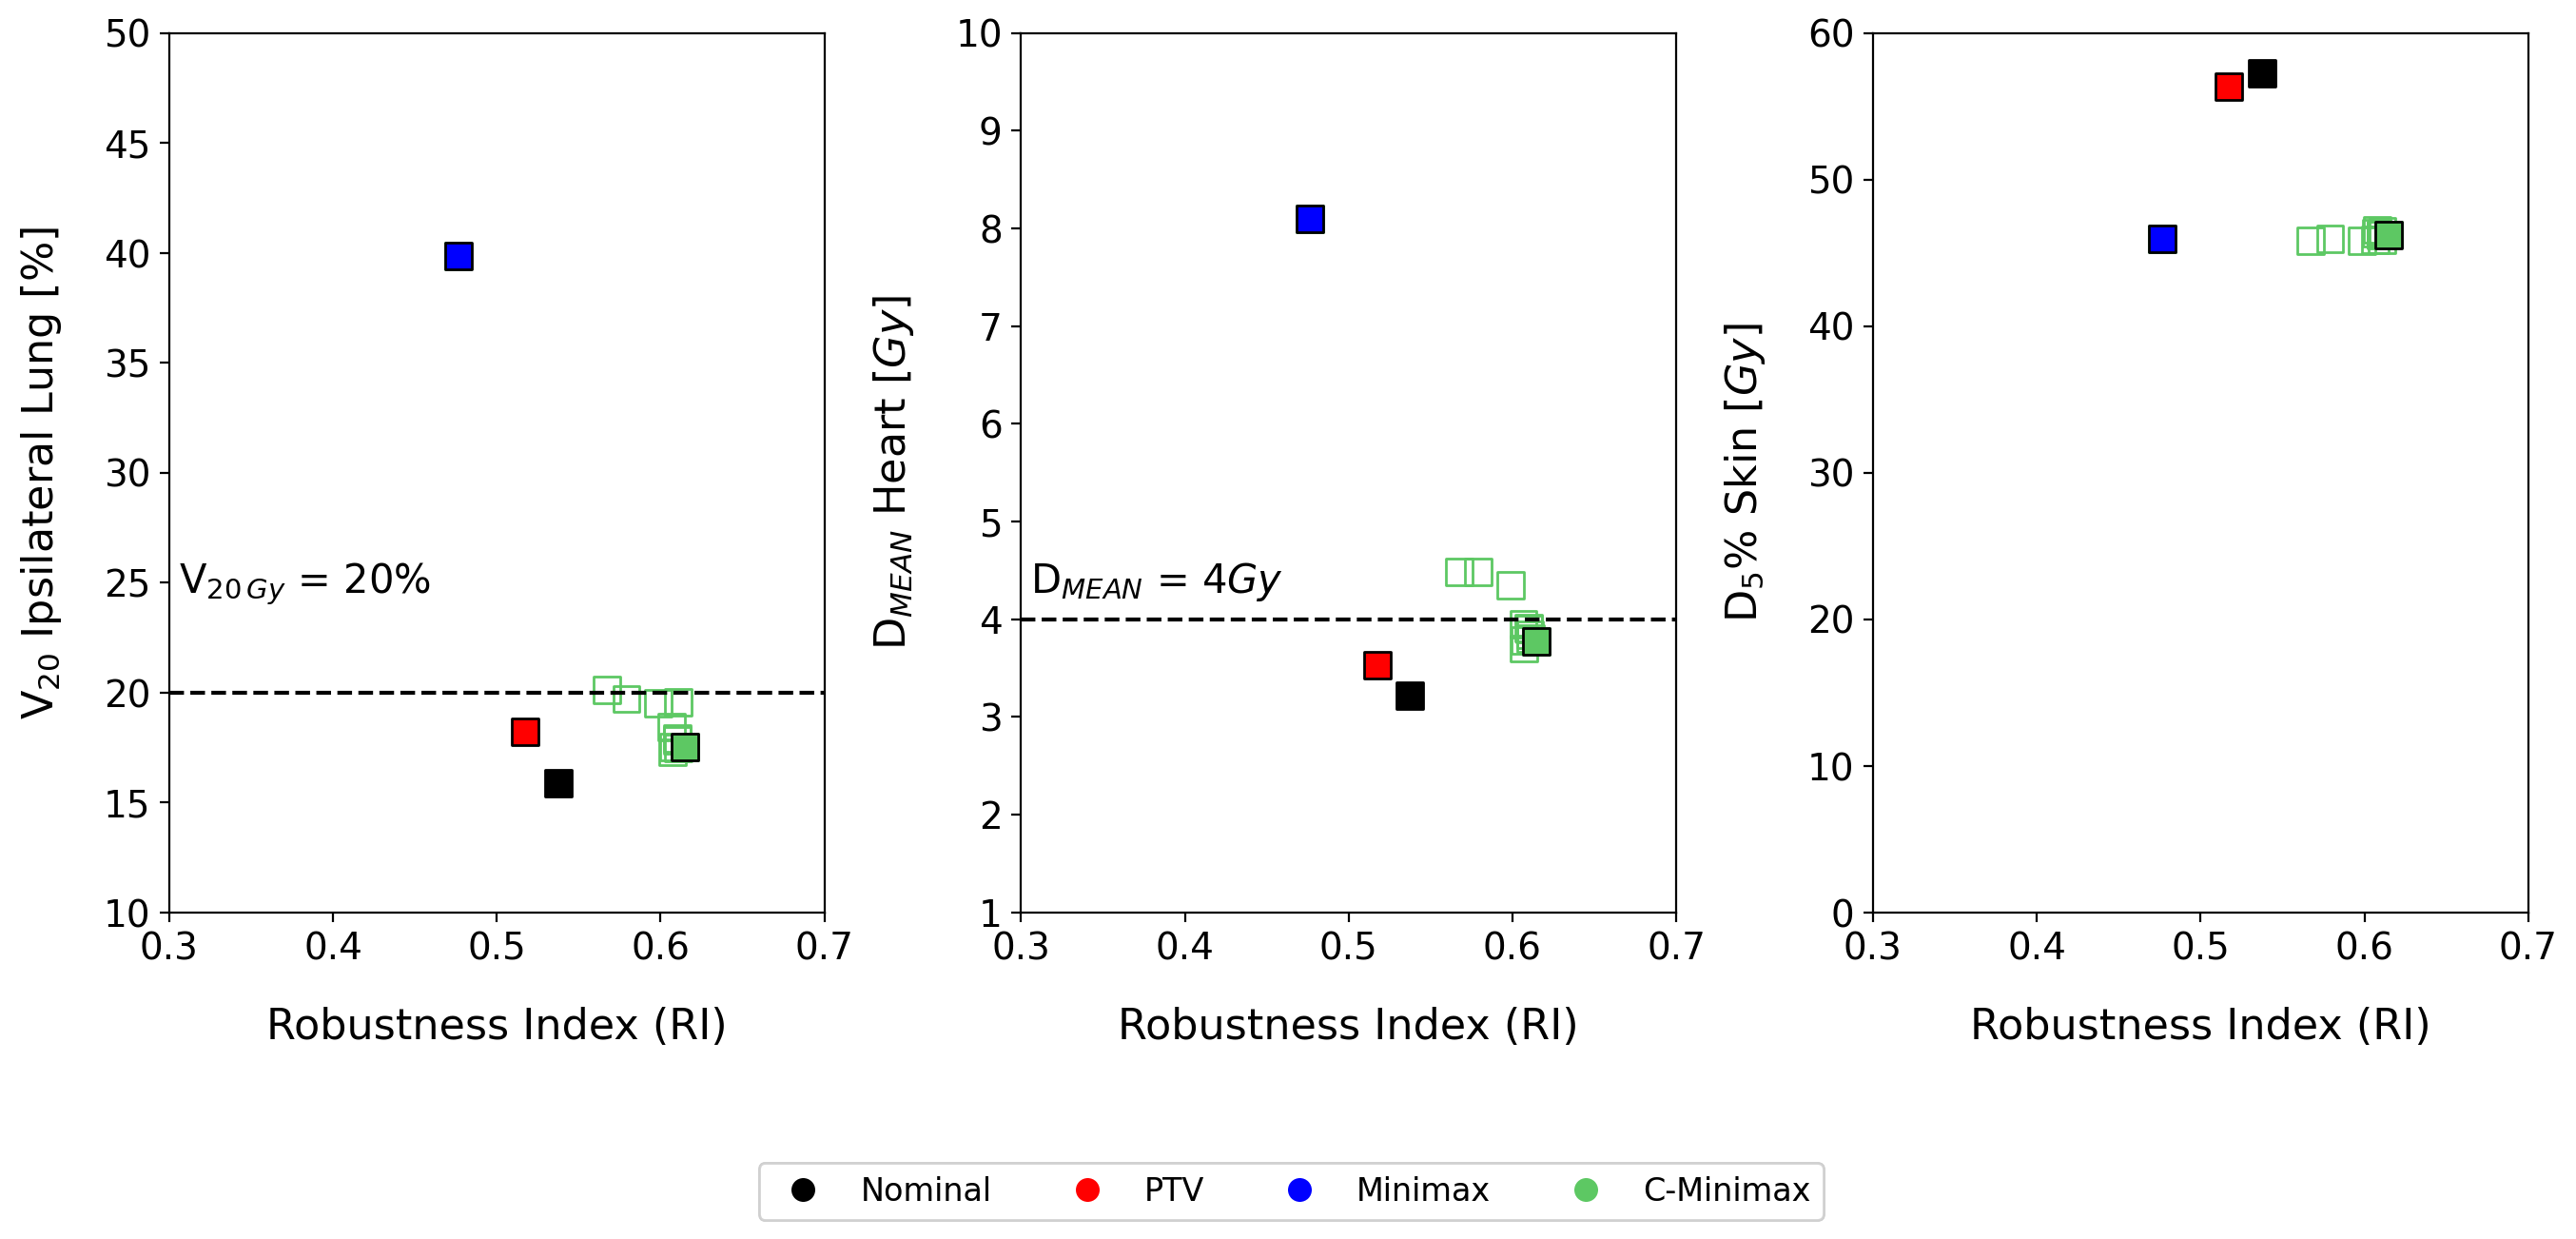

In [417]:
fig=plt.figure(figsize=(16,6))
#fig.suptitle("Proton range (WATER)", fontsize=16)
fig.subplots_adjust(wspace=0.3)

ax1=fig.add_subplot(131)
ax1.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax1.set_ylabel('V$_{20}$ Ipsilateral Lung [%]', fontsize=16,labelpad=15)
ax1.set_xlim([0.3, 0.7])
ax1.set_ylim([10, 50])
#ax1.grid(linestyle='--', linewidth=0.5)
ax1.tick_params(axis='x', labelsize=14 )

ax1.tick_params(axis='y', labelsize=14 )
ax1.set_xscale("linear")
ax1.set_yscale("linear")

x1=np.linspace(0,10,10)

ax1.axhline(y = 20, color = 'black', linestyle = '--')

# V20 Left Lung
for CaseID in [3832]:
    df=breast_df[(breast_df['CaseID']==CaseID)]
    items=['RI CTV','V20 Left Lung']

    data=np.asarray(df[df['Robustness']=='none'].filter(items=items))
    ax1.scatter(*zip(*data), color=get_color('none'), marker=get_marker(CaseID),edgecolor='black',s=100)

    data=np.asarray(df[df['Robustness']=='PTV'].filter(items=items))
    ax1.scatter(*zip(*data), color=get_color('PTV'), marker=get_marker(CaseID),edgecolor='black',s=100)

    data=np.asarray(df[(df['Robustness']=='C-COWC')].filter(items=items))
    ax1.scatter(*zip(*data), color='none', marker=get_marker(CaseID), edgecolor=get_color('C-COWC'),s=100)
    ax1.scatter(data[get_breast_cminimax_index(CaseID)][0],data[get_breast_cminimax_index(CaseID)][1], color=get_color('C-COWC'), marker=get_marker(CaseID), edgecolor='black',s=100)

    data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==1)].filter(items=items))
    ax1.scatter(*zip(*data), color=get_color('COWC'), marker=get_marker(CaseID),edgecolor='black',s=100)

    #data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==13)].filter(items=items))
    #ax1.scatter(*zip(*data), color=get_color('STOCH'), marker=get_marker(CaseID),edgecolor='black',s=100)

if(w1==0):
    a=np.pi/2
else:
    a=np.arctan((100*w1)/w2);
    
#for i in range(-1000, 1000, 10):
#    ax1.axline([-100*np.cos(a)+i/100, -100*np.sin(a)], [100*np.cos(a)+i/100, 100*np.sin(a)],linestyle='--', color='gray', linewidth=0.5)

    
ax1.annotate('V$_{20 \, Gy}$ = 20%', (0.5, 20),
            xytext=(0.40, 0.40), textcoords='axes fraction',
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')
    
ax2=fig.add_subplot(132)
ax2.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax2.set_ylabel('D$_{MEAN}$ Heart [$Gy$]', fontsize=16,labelpad=15)
ax2.set_xlim([0.3, 0.7])
ax2.set_ylim([1, 10])
#ax2.grid(linestyle='--', linewidth=0.5)
ax2.tick_params(axis='x', labelsize=14 )
ax2.tick_params(axis='y', labelsize=14 )
ax2.set_xscale("linear")
ax2.set_yscale("linear")

ax2.axhline(y = 4, color = 'black', linestyle = '--')

# Dmean Heart
for CaseID in [3832]:
    df=breast_df[(breast_df['CaseID']==CaseID)]
    items=['RI CTV','Dmean Heart']

    data=np.asarray(df[df['Robustness']=='none'].filter(items=items))
    ax2.scatter(*zip(*data), color=get_color('none'), marker=get_marker(CaseID),edgecolor='black',s=100)
    
    data=np.asarray(df[df['Robustness']=='PTV'].filter(items=items))
    ax2.scatter(*zip(*data), color=get_color('PTV'), marker=get_marker(CaseID),edgecolor='black',s=100)
    
    data=np.asarray(df[(df['Robustness']=='C-COWC')].filter(items=items))
    ax2.scatter(*zip(*data), color='none', marker=get_marker(CaseID), edgecolor=get_color('C-COWC'),s=100)
    ax2.scatter(data[get_breast_cminimax_index(CaseID)][0],data[get_breast_cminimax_index(CaseID)][1], color=get_color('C-COWC'), marker=get_marker(CaseID), edgecolor='black',s=100)
    
    data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==1)].filter(items=items))
    ax2.scatter(*zip(*data), color=get_color('COWC'), marker=get_marker(CaseID),edgecolor='black',s=100)
    
    #data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==13)].filter(items=items))
    #ax2.scatter(*zip(*data), color=get_color('STOCH'), marker=get_marker(CaseID),edgecolor='black',s=100)

if(w1==0):
    a=np.pi/2
else:
    a=np.arctan((100*w1)/w2);
    
#for i in range(-1000, 1000, 10):
#    ax2.axline([-100*np.cos(a)+i/100, -100*np.sin(a)], [100*np.cos(a)+i/100, 100*np.sin(a)],linestyle='--', color='gray', linewidth=0.5)
    
ax2.annotate('D$_{MEAN}$ = 4$Gy$', (0.5, 4),
            xytext=(0.40, 0.40), textcoords='axes fraction',
            fontsize=15,
            horizontalalignment='right', verticalalignment='top')

ax3=fig.add_subplot(133)
ax3.set_xlabel('Robustness Index (RI)', fontsize=16,labelpad=15)
ax3.set_ylabel('D$_5\%$ Skin [$Gy$]', fontsize=16,labelpad=15)
ax3.set_xlim([0.3, 0.7])
ax3.set_ylim([0, 60])
#ax3.grid(linestyle='--', linewidth=0.5)
ax3.tick_params(axis='x', labelsize=14 )

ax3.tick_params(axis='y', labelsize=14 )
ax3.set_xscale("linear")
ax3.set_yscale("linear")

# Tail width CTV
for CaseID in [3832]:
    df=breast_df[(breast_df['CaseID']==CaseID)]
    items=['RI CTV','D5 Skin']

    data=np.asarray(df[df['Robustness']=='none'].filter(items=items))
    ax3.scatter(*zip(*data), color=get_color('none'), marker=get_marker(CaseID),edgecolor='black',s=100)
    
    data=np.asarray(df[df['Robustness']=='PTV'].filter(items=items))
    ax3.scatter(*zip(*data), color=get_color('PTV'), marker=get_marker(CaseID),edgecolor='black',s=100)
    
    data=np.asarray(df[(df['Robustness']=='C-COWC')].filter(items=items))
    ax3.scatter(*zip(*data), color='none', marker=get_marker(CaseID), edgecolor=get_color('C-COWC'),s=100)
    ax3.scatter(data[get_breast_cminimax_index(CaseID)][0],data[get_breast_cminimax_index(CaseID)][1], color=get_color('C-COWC'), marker=get_marker(CaseID), edgecolor='black',s=100)
    
    data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==1)].filter(items=items))
    ax3.scatter(*zip(*data), color=get_color('COWC'), marker=get_marker(CaseID),edgecolor='black',s=100)
    
    #data=np.asarray(df[(df['Robustness']=='C-COWC') & (df['p2']==13)].filter(items=items))
    #ax3.scatter(*zip(*data), color=get_color('STOCH'), marker=get_marker(CaseID),edgecolor='black',s=100)

if(w1==0):
    a=np.pi/2
else:
    a=np.arctan((100*w1)/w2);
    
#for i in range(-1000, 1000, 10):
#    ax3.axline([-100*np.cos(a)+i/100, -100*np.sin(a)], [100*np.cos(a)+i/100, 100*np.sin(a)],linestyle='--', color='gray', linewidth=0.5)

    
# specify the lines and labels of the first legend
legend_elements = []
    
i=0
for color in colors:
    legend_elements.append([2*i,Line2D([0], [0], marker='o', color='w',mec='w',mfc=color[1], label=get_label(color[0]), markersize=10)])
    i+=1
    
legend_elements = np.array(legend_elements)
legend_elements = legend_elements[legend_elements[:, 0].argsort(kind='mergesort')] 
handles=legend_elements[:,1].tolist()
legend_1 = ax1.legend(handles=handles,loc = (0.9, -0.35), ncol=5,prop={'size': 12})

fig.add_artist(legend_1)